## Loading Libraries

In [361]:
#### loading packages
!pip install missingno

In [496]:
import pandas as pd
import missingno as msno
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#loading xgboost and catboost classifier libraries
!pip install xgboost
!pip install catboost
import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold, cross_val_score

In [5]:
!pip install shap==0.40.0

In [6]:
import shap

In [7]:
!pip install varclushi
from varclushi import VarClusHi

In [8]:
from skopt import BayesSearchCV, space, plots
#from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import SCORERS

In [366]:
import sklearn.metrics as metrics

In [495]:
!pip install matplotlib==3.4.0

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\users\\anto\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:


## DATASET

In [55]:
#Loading dataset
df = pd.read_csv('data_for_model.csv')

In [56]:
df

record_id   age  length_of_membership_in_months contract_type  \
0               1  35.0                            56.0      Standard   
1               2  49.0                            52.0      Standard   
2               3  41.0                            56.0      Standard   
3               4  46.0                            31.0      Standard   
4               5  28.0                             6.0      Standard   
...           ...   ...                             ...           ...   
239995     239996  61.0                            62.0      Standard   
239996     239997  39.0                            13.0      Standard   
239997     239998  12.0                           106.0        Annual   
239998     239999  45.0                             9.0      Standard   
239999     240000  21.0                            11.0      Standard   

       reporting_grouping  monthly_membership_fee  attendance_recency_in_days  \
0                    Full               76.666664                           7   
1                     H&F               59.166668                          18   
2                     H&F               78.333336                           4   
3                   Other               62.500000                          61   
4                    Plus               82.500000                          61   
...                   ...                     ...                         ...   
239995               Full               50.833332                           7   
239996           Platinum               70.833336                           7   
239997              Child               19.791666                          61   
239998           Platinum               69.166664                          28   
239999              Other               48.333332                           2   

        attendance_two_months_ago  attendance_last_month  ex_member_flag  \
0                               4                      7               1   
1                               1                      0               0   
2                               3                      3               0   
3                               0                      0               0   
4                               0                      0               1   
...                           ...                    ...             ...   
239995                          3                      4               1   
239996                         11                     11               0   
239997                          0                      0               1   
239998                          1                      1               1   
239999                         10                      7               0   

        cancelled_membership_this_month  
0                                     1  
1                                     1  
2                                     1  
3                                     1  
4                                     1  
...                                 ...  
239995                                0  
239996                                0  
239997                                0  
239998                                0  
239999                                0  

[240000 rows x 11 columns]

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 11 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   record_id                        240000 non-null  int64  
 1   age                              236000 non-null  float64
 2   length_of_membership_in_months   239999 non-null  float64
 3   contract_type                    240000 non-null  object 
 4   reporting_grouping               240000 non-null  object 
 5   monthly_membership_fee           240000 non-null  float64
 6   attendance_recency_in_days       240000 non-null  int64  
 7   attendance_two_months_ago        240000 non-null  int64  
 8   attendance_last_month            240000 non-null  int64  
 9   ex_member_flag                   240000 non-null  int64  
 10  cancelled_membership_this_month  240000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 20.1+ MB


<AxesSubplot:>

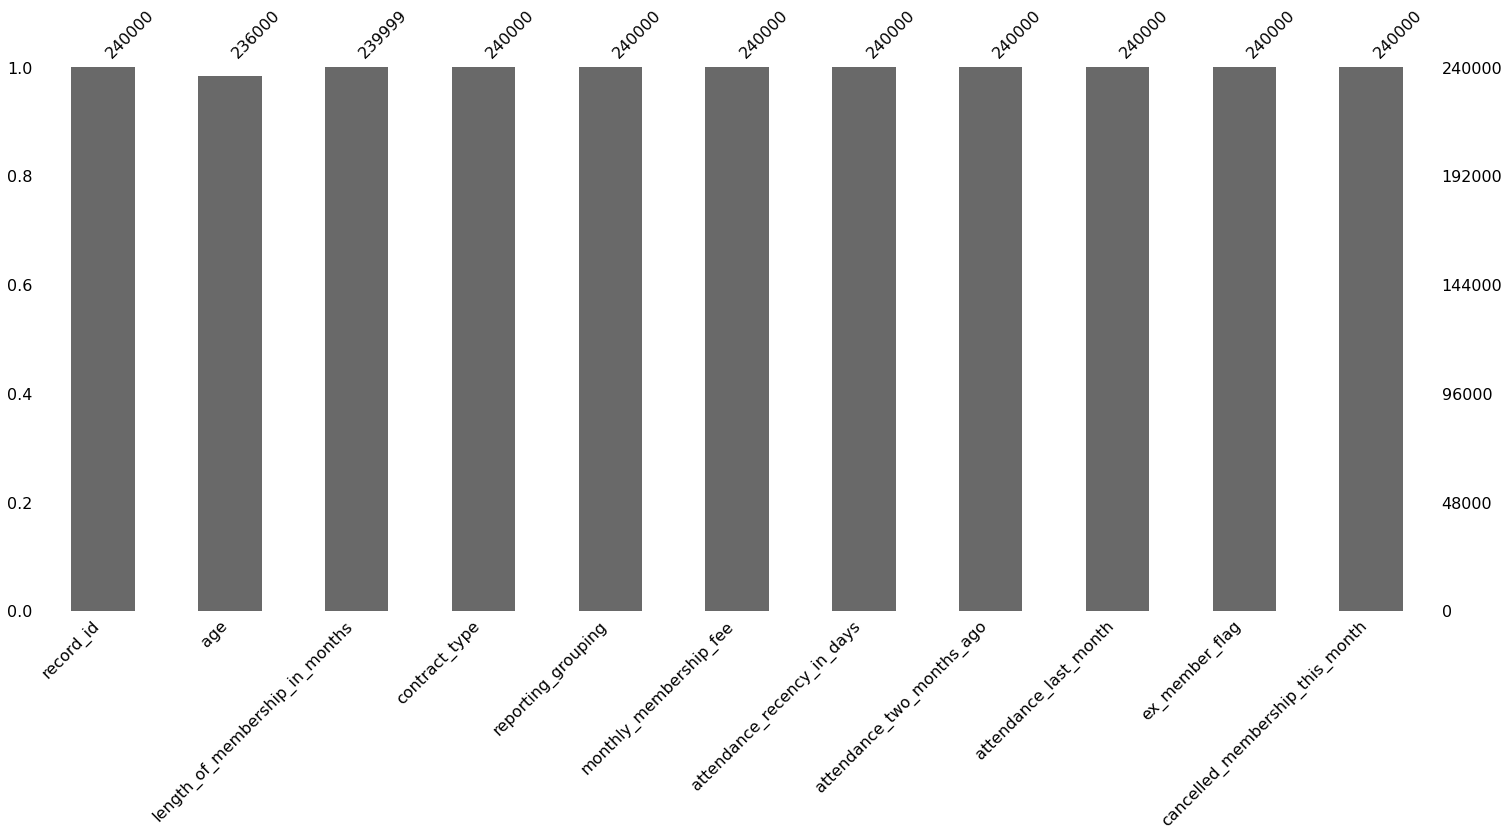

In [12]:
#plotting missing values
msno.bar(df)

## VARIABLE ANALYSIS

#### Univariate Analysis - Categorical Variables

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='reporting_grouping', ylabel='count'>

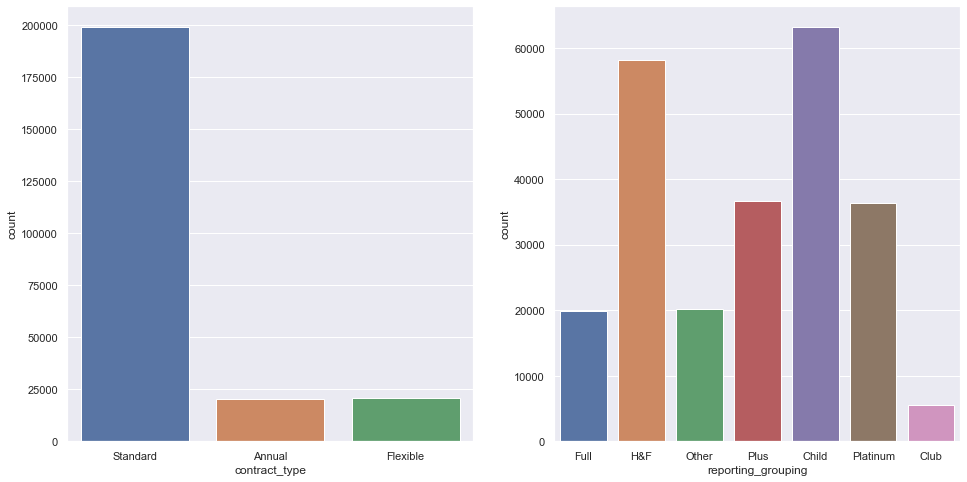

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

sns.countplot(df['contract_type'], ax=ax[0])
sns.countplot(df['reporting_grouping'], ax=ax[1])


In [59]:
df['contract_type'].value_counts(normalize=True)

Standard    0.829521
Flexible    0.085913
Annual      0.084567
Name: contract_type, dtype: float64

In [60]:
ct_contract_type = pd.crosstab(df['contract_type'], df
                 ['cancelled_membership_this_month'],  
                 normalize= True, 
                 margins=True, margins_name='Total')
ct_contract_type.style.format('{:.2%}')

In [61]:
ct_reporting_grouping = pd.crosstab(df['reporting_grouping'], df
                 ['cancelled_membership_this_month'],  
                 normalize= True, 
                 margins=True, margins_name='Total')

ct_reporting_grouping.style.format('{:.2%}')

In [62]:
ct_reporting_grouping = pd.crosstab(df['reporting_grouping'], df
                 ['contract_type'],  
                 normalize= True, 
                 margins=True, margins_name='Total')
ct_reporting_grouping.style.format('{:.2%}')

In [63]:
#generating a NEW variable by bucketing the original one
def Type(df):    
    if ((df['reporting_grouping'] == 'Child') & (df['age'] in (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18))):
        return 'Child'
    elif (df['reporting_grouping'] in ('Club','Full','H&F','Other','Platinum','Plus')):
        return 'Individual'

In [64]:
#df['membership_type'] = df.apply(Type, axis = 1)

In [65]:
df

record_id   age  length_of_membership_in_months contract_type  \
0               1  35.0                            56.0      Standard   
1               2  49.0                            52.0      Standard   
2               3  41.0                            56.0      Standard   
3               4  46.0                            31.0      Standard   
4               5  28.0                             6.0      Standard   
...           ...   ...                             ...           ...   
239995     239996  61.0                            62.0      Standard   
239996     239997  39.0                            13.0      Standard   
239997     239998  12.0                           106.0        Annual   
239998     239999  45.0                             9.0      Standard   
239999     240000  21.0                            11.0      Standard   

       reporting_grouping  monthly_membership_fee  attendance_recency_in_days  \
0                    Full               76.666664                           7   
1                     H&F               59.166668                          18   
2                     H&F               78.333336                           4   
3                   Other               62.500000                          61   
4                    Plus               82.500000                          61   
...                   ...                     ...                         ...   
239995               Full               50.833332                           7   
239996           Platinum               70.833336                           7   
239997              Child               19.791666                          61   
239998           Platinum               69.166664                          28   
239999              Other               48.333332                           2   

        attendance_two_months_ago  attendance_last_month  ex_member_flag  \
0                               4                      7               1   
1                               1                      0               0   
2                               3                      3               0   
3                               0                      0               0   
4                               0                      0               1   
...                           ...                    ...             ...   
239995                          3                      4               1   
239996                         11                     11               0   
239997                          0                      0               1   
239998                          1                      1               1   
239999                         10                      7               0   

        cancelled_membership_this_month  
0                                     1  
1                                     1  
2                                     1  
3                                     1  
4                                     1  
...                                 ...  
239995                                0  
239996                                0  
239997                                0  
239998                                0  
239999                                0  

[240000 rows x 11 columns]

#### Bivariate Analysis

<AxesSubplot:xlabel='cancelled_membership_this_month'>

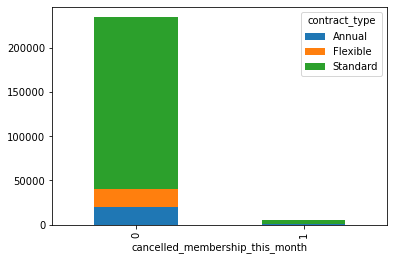

In [20]:
df_plot = df.groupby(['contract_type', 'cancelled_membership_this_month']).size().reset_index().pivot(columns='contract_type', index='cancelled_membership_this_month', values=0)
df_plot.plot(kind='bar', stacked=True)

#### Univariate analysis - Numeric variables

In [66]:
# identifying numeric variables (9 in total)
num_cols = df._get_numeric_data().columns
num_cols

Index(['record_id', 'age', 'length_of_membership_in_months',
       'monthly_membership_fee', 'attendance_recency_in_days',
       'attendance_two_months_ago', 'attendance_last_month', 'ex_member_flag',
       'cancelled_membership_this_month'],
      dtype='object')

In [67]:
df.describe()

record_id            age  length_of_membership_in_months  \
count  240000.00000  236000.000000                   239999.000000   
mean   120000.50000      35.320716                       49.899241   
std     69282.17664      20.264812                       61.145270   
min         1.00000       0.000000                        0.000000   
25%     60000.75000      17.000000                        9.000000   
50%    120000.50000      37.000000                       26.000000   
75%    180000.25000      51.000000                       66.000000   
max    240000.00000     119.000000                      876.000000   

       monthly_membership_fee  attendance_recency_in_days  \
count           240000.000000               240000.000000   
mean                57.270664                   19.320296   
std                564.303217                   22.706821   
min                  0.000000                    1.000000   
25%                 29.166666                    2.000000   
50%                 54.652779                    7.000000   
75%                 74.125000                   32.000000   
max             123456.992200                   62.000000   

       attendance_two_months_ago  attendance_last_month  ex_member_flag  \
count              240000.000000          240000.000000   240000.000000   
mean                    5.199992               4.624521        0.448200   
std                     5.653013               5.365672        0.497311   
min                     0.000000               0.000000        0.000000   
25%                     0.000000               0.000000        0.000000   
50%                     3.000000               3.000000        0.000000   
75%                     8.000000               7.000000        1.000000   
max                    31.000000              31.000000        1.000000   

       cancelled_membership_this_month  
count                    240000.000000  
mean                          0.021012  
std                           0.143426  
min                           0.000000  
25%                           0.000000  
50%                           0.000000  
75%                           0.000000  
max                           1.000000

In [68]:
# identifying numeric variables 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)
df_num

record_id   age  length_of_membership_in_months  \
0               1  35.0                            56.0   
1               2  49.0                            52.0   
2               3  41.0                            56.0   
3               4  46.0                            31.0   
4               5  28.0                             6.0   
...           ...   ...                             ...   
239995     239996  61.0                            62.0   
239996     239997  39.0                            13.0   
239997     239998  12.0                           106.0   
239998     239999  45.0                             9.0   
239999     240000  21.0                            11.0   

        monthly_membership_fee  attendance_recency_in_days  \
0                    76.666664                           7   
1                    59.166668                          18   
2                    78.333336                           4   
3                    62.500000                          61   
4                    82.500000                          61   
...                        ...                         ...   
239995               50.833332                           7   
239996               70.833336                           7   
239997               19.791666                          61   
239998               69.166664                          28   
239999               48.333332                           2   

        attendance_two_months_ago  attendance_last_month  ex_member_flag  \
0                               4                      7               1   
1                               1                      0               0   
2                               3                      3               0   
3                               0                      0               0   
4                               0                      0               1   
...                           ...                    ...             ...   
239995                          3                      4               1   
239996                         11                     11               0   
239997                          0                      0               1   
239998                          1                      1               1   
239999                         10                      7               0   

        cancelled_membership_this_month  
0                                     1  
1                                     1  
2                                     1  
3                                     1  
4                                     1  
...                                 ...  
239995                                0  
239996                                0  
239997                                0  
239998                                0  
239999                                0  

[240000 rows x 9 columns]

In [69]:
#generating a loop to plot numeric variables and assess their distribution
columns = df_num.columns
columns = list(columns)
columns

['record_id',
 'age',
 'length_of_membership_in_months',
 'monthly_membership_fee',
 'attendance_recency_in_days',
 'attendance_two_months_ago',
 'attendance_last_month',
 'ex_member_flag',
 'cancelled_membership_this_month']

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data

<Figure size 576x360 with 0 Axes>

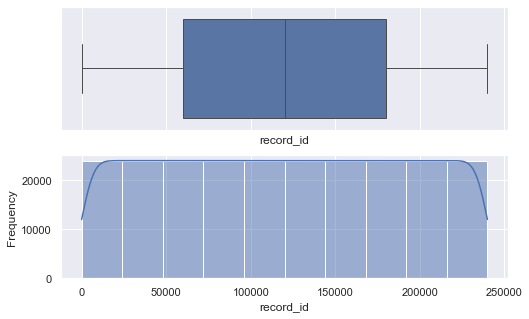

<Figure size 576x360 with 0 Axes>

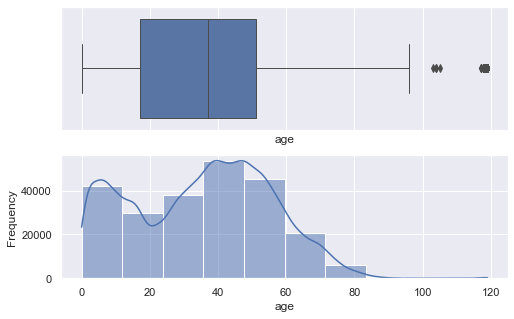

<Figure size 576x360 with 0 Axes>

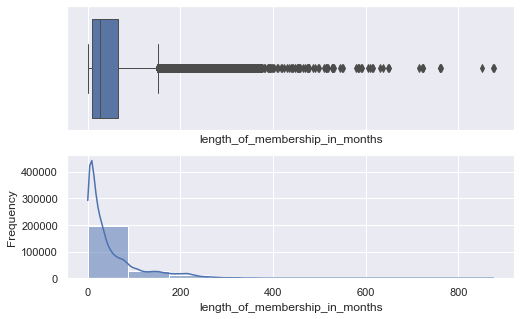

<Figure size 576x360 with 0 Axes>

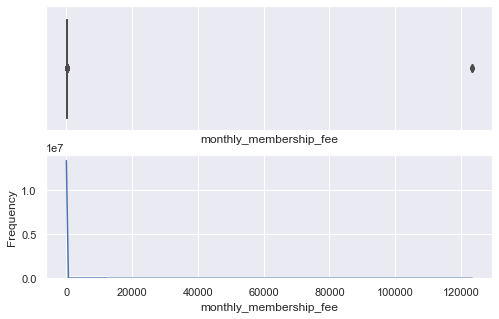

<Figure size 576x360 with 0 Axes>

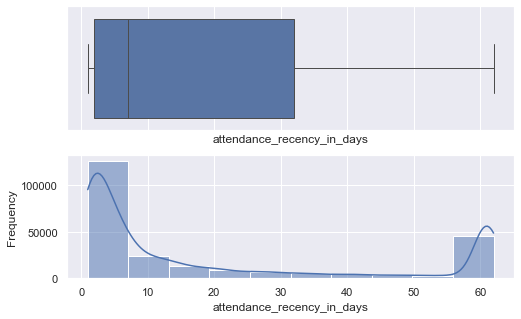

<Figure size 576x360 with 0 Axes>

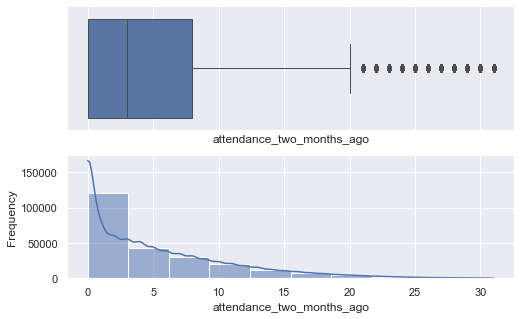

<Figure size 576x360 with 0 Axes>

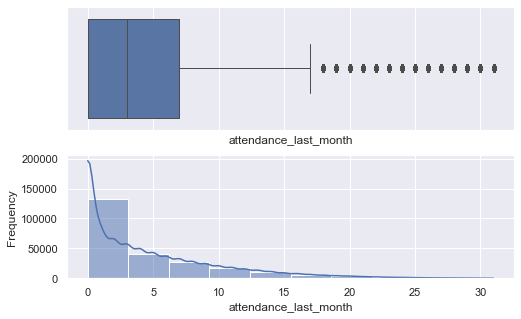

<Figure size 576x360 with 0 Axes>

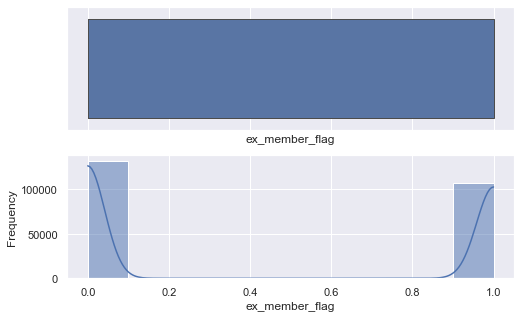

<Figure size 576x360 with 0 Axes>

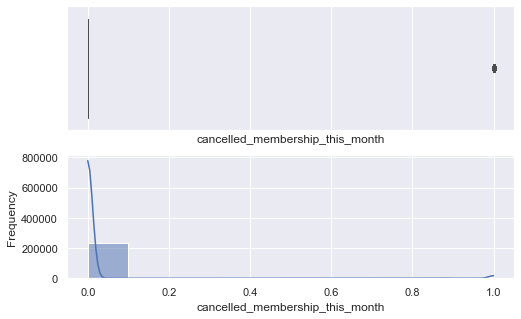

In [70]:
for i in columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

In [71]:
df["age"].fillna('n/a', inplace = True)

In [72]:
df.describe()

record_id  length_of_membership_in_months  monthly_membership_fee  \
count  240000.00000                   239999.000000           240000.000000   
mean   120000.50000                       49.899241               57.270664   
std     69282.17664                       61.145270              564.303217   
min         1.00000                        0.000000                0.000000   
25%     60000.75000                        9.000000               29.166666   
50%    120000.50000                       26.000000               54.652779   
75%    180000.25000                       66.000000               74.125000   
max    240000.00000                      876.000000           123456.992200   

       attendance_recency_in_days  attendance_two_months_ago  \
count               240000.000000              240000.000000   
mean                    19.320296                   5.199992   
std                     22.706821                   5.653013   
min                      1.000000                   0.000000   
25%                      2.000000                   0.000000   
50%                      7.000000                   3.000000   
75%                     32.000000                   8.000000   
max                     62.000000                  31.000000   

       attendance_last_month  ex_member_flag  cancelled_membership_this_month  
count          240000.000000   240000.000000                    240000.000000  
mean                4.624521        0.448200                         0.021012  
std                 5.365672        0.497311                         0.143426  
min                 0.000000        0.000000                         0.000000  
25%                 0.000000        0.000000                         0.000000  
50%                 3.000000        0.000000                         0.000000  
75%                 7.000000        1.000000                         0.000000  
max                31.000000        1.000000                         1.000000

In [73]:
df[(df['age'] == 'n/a')]

record_id  age  length_of_membership_in_months contract_type  \
54             55  n/a                            47.0        Annual   
114           115  n/a                            91.0      Standard   
174           175  n/a                            12.0      Standard   
234           235  n/a                             9.0      Standard   
294           295  n/a                           174.0        Annual   
...           ...  ...                             ...           ...   
239754     239755  n/a                            30.0      Standard   
239814     239815  n/a                             0.0      Standard   
239874     239875  n/a                             0.0      Standard   
239934     239935  n/a                            16.0      Standard   
239994     239995  n/a                             9.0      Standard   

       reporting_grouping  monthly_membership_fee  attendance_recency_in_days  \
54                   Plus               67.083336                           5   
114                   H&F               48.012131                          61   
174                 Other               43.333332                           3   
234                 Child               20.833334                          40   
294                  Plus               39.097221                          13   
...                   ...                     ...                         ...   
239754              Child               25.000000                           1   
239814              Child                0.000000                           2   
239874               Plus               56.666668                           2   
239934              Child               33.333332                          35   
239994              Child               20.833334                           4   

        attendance_two_months_ago  attendance_last_month  ex_member_flag  \
54                             12                     11               0   
114                             0                      0               1   
174                             1                      2               1   
234                             0                      1               0   
294                             2                      3               0   
...                           ...                    ...             ...   
239754                         17                      6               1   
239814                          3                      0               0   
239874                          2                      0               1   
239934                          0                      1               0   
239994                          4                      6               0   

        cancelled_membership_this_month  
54                                    1  
114                                   1  
174                                   1  
234                                   1  
294                                   1  
...                                 ...  
239754                                0  
239814                                0  
239874                                0  
239934                                0  
239994                                0  

[4000 rows x 11 columns]

In [74]:
#converting the age variable into categorical: age bands
def AgeBands(df):    
    if (df['age'] in (0,1,2)):
        return '1-2'
    elif (df['age'] == 'n/a'):
        return 'n/a'
    elif (df['age'] in (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18)):
        return '3-18'
    elif (df['age'] in (19,20,21,22,23,24)):
        return '19-24'
    elif (df['age'] in (25,26,27,28,29,30,31,32,33,34)):
        return '25-34'
    elif (df['age'] in (35,36,37,38,39,40,41,42,43,44)):
        return '35-44'
    elif (df['age'] in (45,46,47,48,49,50,51,52,53,54)):
        return '45-54'
    elif (df['age'] in (55,56,57,58,59,60,61,62,63,64)):
        return '55-64'
    elif (df['age'] in (65,66,67,68,69,70,71,72,73,74)):
        return '65-74'
    elif (df['age'] in (75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,103,104,105,117,118,119)):
        return '75+'

In [75]:
df['age_bands'] = df.apply(AgeBands, axis = 1)

In [76]:
df['age_bands'].value_counts()

3-18     52324
35-44    43715
45-54    43155
25-34    31909
55-64    26387
65-74    12675
19-24    11912
1-2      10110
n/a       4000
75+       3813
Name: age_bands, dtype: int64

In [77]:
ct_age_bands = pd.crosstab(df['age_bands'], df
                 ['cancelled_membership_this_month'],  
                 normalize= True, 
                 margins=True, margins_name='Total')
ct_age_bands.style.format('{:.2%}')

In [80]:
df['length_of_membership_in_months'].fillna(29, inplace = True)

In [81]:
df['quantile_rank'] = pd.qcut(df['length_of_membership_in_months'], 4,
                               labels = False)

In [82]:
viz = df[['length_of_membership_in_months','quantile_rank']]

In [83]:
viz.describe()

length_of_membership_in_months  quantile_rank
count                   240000.000000  240000.000000
mean                        49.899154       1.487283
std                         61.145157       1.118843
min                          0.000000       0.000000
25%                          9.000000       0.000000
50%                         26.000000       1.000000
75%                         66.000000       2.000000
max                        876.000000       3.000000

In [84]:
df['quantile_rank'].value_counts()

1    61800
0    60496
3    59740
2    57964
Name: quantile_rank, dtype: int64

In [85]:
#using quantile stats to generate bands for the membership_length variable
def membership_length(df):    
    if (df['quantile_rank'] == 0):
        return 'less than 1 year'
    elif (df['quantile_rank'] == 1):
        return 'between 1 year and 2 years'
    elif (df['quantile_rank'] == 2):
        return 'between 2 years and 6 years'
    elif (df['quantile_rank'] == 3):
        return 'more than 6 years'

In [86]:
df['membership_length'] = df.apply(membership_length, axis = 1)

In [87]:
df['membership_length'].value_counts()

between 1 year and 2 years     61800
less than 1 year               60496
more than 6 years              59740
between 2 years and 6 years    57964
Name: membership_length, dtype: int64

In [88]:
# truncating monthly_membership_fee to tackle outliers
df['monthly_membership_fee'] = df['monthly_membership_fee'].replace([123456.9922], 249.166672)

In [89]:
df[(df['monthly_membership_fee'] > 300)]

Empty DataFrame
Columns: [record_id, age, length_of_membership_in_months, contract_type, reporting_grouping, monthly_membership_fee, attendance_recency_in_days, attendance_two_months_ago, attendance_last_month, ex_member_flag, cancelled_membership_this_month, age_bands, quantile_rank, membership_length]
Index: []

In [90]:
df

record_id   age  length_of_membership_in_months contract_type  \
0               1  35.0                            56.0      Standard   
1               2  49.0                            52.0      Standard   
2               3  41.0                            56.0      Standard   
3               4  46.0                            31.0      Standard   
4               5  28.0                             6.0      Standard   
...           ...   ...                             ...           ...   
239995     239996  61.0                            62.0      Standard   
239996     239997  39.0                            13.0      Standard   
239997     239998  12.0                           106.0        Annual   
239998     239999  45.0                             9.0      Standard   
239999     240000  21.0                            11.0      Standard   

       reporting_grouping  monthly_membership_fee  attendance_recency_in_days  \
0                    Full               76.666664                           7   
1                     H&F               59.166668                          18   
2                     H&F               78.333336                           4   
3                   Other               62.500000                          61   
4                    Plus               82.500000                          61   
...                   ...                     ...                         ...   
239995               Full               50.833332                           7   
239996           Platinum               70.833336                           7   
239997              Child               19.791666                          61   
239998           Platinum               69.166664                          28   
239999              Other               48.333332                           2   

        attendance_two_months_ago  attendance_last_month  ex_member_flag  \
0                               4                      7               1   
1                               1                      0               0   
2                               3                      3               0   
3                               0                      0               0   
4                               0                      0               1   
...                           ...                    ...             ...   
239995                          3                      4               1   
239996                         11                     11               0   
239997                          0                      0               1   
239998                          1                      1               1   
239999                         10                      7               0   

        cancelled_membership_this_month age_bands  quantile_rank  \
0                                     1     35-44              2   
1                                     1     45-54              2   
2                                     1     35-44              2   
3                                     1     45-54              2   
4                                     1     25-34              0   
...                                 ...       ...            ...   
239995                                0     55-64              2   
239996                                0     35-44              1   
239997                                0      3-18              3   
239998                                0     45-54              0   
239999                                0     19-24              1   

                  membership_length  
0       between 2 years and 6 years  
1       between 2 years and 6 years  
2       between 2 years and 6 years  
3       between 2 years and 6 years  
4                  less than 1 year  
...                             ...  
239995  between 2 years and 6 years  
239996   between 1 year and 2 years  
239997            more than 6 years  
239998             less than 1 year  
239999   b

#### Correlation Analysis

In [91]:
corrMatrix = df.corr()
#print (corrMatrix)
corrMatrix.style.background_gradient(cmap='coolwarm').set_precision(2)

In [466]:
import plotly.express as px
fig = px.imshow(df.corr())
fig.show()

In [92]:
df_num

record_id   age  length_of_membership_in_months  \
0               1  35.0                            56.0   
1               2  49.0                            52.0   
2               3  41.0                            56.0   
3               4  46.0                            31.0   
4               5  28.0                             6.0   
...           ...   ...                             ...   
239995     239996  61.0                            62.0   
239996     239997  39.0                            13.0   
239997     239998  12.0                           106.0   
239998     239999  45.0                             9.0   
239999     240000  21.0                            11.0   

        monthly_membership_fee  attendance_recency_in_days  \
0                    76.666664                           7   
1                    59.166668                          18   
2                    78.333336                           4   
3                    62.500000                          61   
4                    82.500000                          61   
...                        ...                         ...   
239995               50.833332                           7   
239996               70.833336                           7   
239997               19.791666                          61   
239998               69.166664                          28   
239999               48.333332                           2   

        attendance_two_months_ago  attendance_last_month  ex_member_flag  \
0                               4                      7               1   
1                               1                      0               0   
2                               3                      3               0   
3                               0                      0               0   
4                               0                      0               1   
...                           ...                    ...             ...   
239995                          3                      4               1   
239996                         11                     11               0   
239997                          0                      0               1   
239998                          1                      1               1   
239999                         10                      7               0   

        cancelled_membership_this_month  
0                                     1  
1                                     1  
2                                     1  
3                                     1  
4                                     1  
...                                 ...  
239995                                0  
239996                                0  
239997                                0  
239998                                0  
239999                                0  

[240000 rows x 9 columns]

In [93]:
drop = df_num[['cancelled_membership_this_month','record_id']]
df_clustering = df_num.drop(drop, axis=1)
df_clustering

age  length_of_membership_in_months  monthly_membership_fee  \
0       35.0                            56.0               76.666664   
1       49.0                            52.0               59.166668   
2       41.0                            56.0               78.333336   
3       46.0                            31.0               62.500000   
4       28.0                             6.0               82.500000   
...      ...                             ...                     ...   
239995  61.0                            62.0               50.833332   
239996  39.0                            13.0               70.833336   
239997  12.0                           106.0               19.791666   
239998  45.0                             9.0               69.166664   
239999  21.0                            11.0               48.333332   

        attendance_recency_in_days  attendance_two_months_ago  \
0                                7                          4   
1                               18                          1   
2                                4                          3   
3                               61                          0   
4                               61                          0   
...                            ...                        ...   
239995                           7                          3   
239996                           7                         11   
239997                          61                          0   
239998                          28                          1   
239999                           2                         10   

        attendance_last_month  ex_member_flag  
0                           7               1  
1                           0               0  
2                           3               0  
3                           0               0  
4                           0               1  
...                       ...             ...  
239995                      4               1  
239996                     11               0  
239997                      0               1  
239998                      1               1  
239999                      7               0  

[240000 rows x 7 columns]

#### Variable Clustering

In [94]:
clust_model = VarClusHi(df_clustering, maxeigval2 = 0.7, maxclus = None)
clust_model.varclus()

LinAlgError: Eigenvalues did not converge

In [52]:
clust_model.info

AttributeError: 'VarClusHi' object has no attribute 'clusters'

In [175]:
clust_model.rsquare

Cluster                         Variable    RS_Own     RS_NC      RS_Ratio
0       0       attendance_recency_in_days  0.637913  0.018908  3.690654e-01
1       0        attendance_two_months_ago  0.856008  0.034759  1.491772e-01
2       0            attendance_last_month  0.765907  0.028394  2.409345e-01
3       1                   ex_member_flag  1.000000  0.004669  0.000000e+00
4       2  cancelled_membership_this_month  1.000000  0.002870  2.226837e-16
5       3           monthly_membership_fee  1.000000  0.036171  0.000000e+00

In [95]:
df

record_id   age  length_of_membership_in_months contract_type  \
0               1  35.0                            56.0      Standard   
1               2  49.0                            52.0      Standard   
2               3  41.0                            56.0      Standard   
3               4  46.0                            31.0      Standard   
4               5  28.0                             6.0      Standard   
...           ...   ...                             ...           ...   
239995     239996  61.0                            62.0      Standard   
239996     239997  39.0                            13.0      Standard   
239997     239998  12.0                           106.0        Annual   
239998     239999  45.0                             9.0      Standard   
239999     240000  21.0                            11.0      Standard   

       reporting_grouping  monthly_membership_fee  attendance_recency_in_days  \
0                    Full               76.666664                           7   
1                     H&F               59.166668                          18   
2                     H&F               78.333336                           4   
3                   Other               62.500000                          61   
4                    Plus               82.500000                          61   
...                   ...                     ...                         ...   
239995               Full               50.833332                           7   
239996           Platinum               70.833336                           7   
239997              Child               19.791666                          61   
239998           Platinum               69.166664                          28   
239999              Other               48.333332                           2   

        attendance_two_months_ago  attendance_last_month  ex_member_flag  \
0                               4                      7               1   
1                               1                      0               0   
2                               3                      3               0   
3                               0                      0               0   
4                               0                      0               1   
...                           ...                    ...             ...   
239995                          3                      4               1   
239996                         11                     11               0   
239997                          0                      0               1   
239998                          1                      1               1   
239999                         10                      7               0   

        cancelled_membership_this_month age_bands  quantile_rank  \
0                                     1     35-44              2   
1                                     1     45-54              2   
2                                     1     35-44              2   
3                                     1     45-54              2   
4                                     1     25-34              0   
...                                 ...       ...            ...   
239995                                0     55-64              2   
239996                                0     35-44              1   
239997                                0      3-18              3   
239998                                0     45-54              0   
239999                                0     19-24              1   

                  membership_length  
0       between 2 years and 6 years  
1       between 2 years and 6 years  
2       between 2 years and 6 years  
3       between 2 years and 6 years  
4                  less than 1 year  
...                             ...  
239995  between 2 years and 6 years  
239996   between 1 year and 2 years  
239997            more than 6 years  
239998             less than 1 year  
239999   b

In [96]:
drop = df[['record_id','length_of_membership_in_months','quantile_rank','attendance_two_months_ago','attendance_last_month','age']]
df_model = df.drop(drop, axis=1)

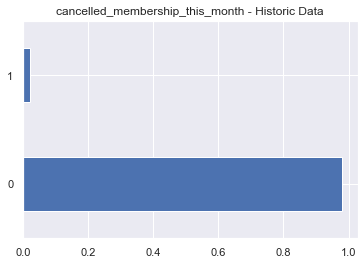

In [478]:
df_model['cancelled_membership_this_month'].value_counts(normalize=True).plot(kind='barh')
plt.title('cancelled_membership_this_month - Historic Data')
plt.show()

In [98]:
df_model.describe()

monthly_membership_fee  attendance_recency_in_days  ex_member_flag  \
count           240000.000000               240000.000000   240000.000000   
mean                54.703834                   19.320296        0.448200   
std                 34.519213                   22.706821        0.497311   
min                  0.000000                    1.000000        0.000000   
25%                 29.166666                    2.000000        0.000000   
50%                 54.652779                    7.000000        0.000000   
75%                 74.125000                   32.000000        1.000000   
max                249.166672                   62.000000        1.000000   

       cancelled_membership_this_month  
count                    240000.000000  
mean                          0.021012  
std                           0.143426  
min                           0.000000  
25%                           0.000000  
50%                           0.000000  
75%                           0.000000  
max                           1.000000

In [99]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 8 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   contract_type                    240000 non-null  object 
 1   reporting_grouping               240000 non-null  object 
 2   monthly_membership_fee           240000 non-null  float64
 3   attendance_recency_in_days       240000 non-null  int64  
 4   ex_member_flag                   240000 non-null  int64  
 5   cancelled_membership_this_month  240000 non-null  int64  
 6   age_bands                        240000 non-null  object 
 7   membership_length                240000 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 14.6+ MB


## MODEL

In [100]:
# storing features and target in separate variables
label = df_model['cancelled_membership_this_month']
features = df_model.drop('cancelled_membership_this_month', axis=1)

In [101]:
label

0         1
1         1
2         1
3         1
4         1
         ..
239995    0
239996    0
239997    0
239998    0
239999    0
Name: cancelled_membership_this_month, Length: 240000, dtype: int64

In [102]:
features

contract_type reporting_grouping  monthly_membership_fee  \
0           Standard               Full               76.666664   
1           Standard                H&F               59.166668   
2           Standard                H&F               78.333336   
3           Standard              Other               62.500000   
4           Standard               Plus               82.500000   
...              ...                ...                     ...   
239995      Standard               Full               50.833332   
239996      Standard           Platinum               70.833336   
239997        Annual              Child               19.791666   
239998      Standard           Platinum               69.166664   
239999      Standard              Other               48.333332   

        attendance_recency_in_days  ex_member_flag age_bands  \
0                                7               1     35-44   
1                               18               0     45-54   
2                                4               0     35-44   
3                               61               0     45-54   
4                               61               1     25-34   
...                            ...             ...       ...   
239995                           7               1     55-64   
239996                           7               0     35-44   
239997                          61               1      3-18   
239998                          28               1     45-54   
239999                           2               0     19-24   

                  membership_length  
0       between 2 years and 6 years  
1       between 2 years and 6 years  
2       between 2 years and 6 years  
3       between 2 years and 6 years  
4                  less than 1 year  
...                             ...  
239995  between 2 years and 6 years  
239996   between 1 year and 2 years  
239997            more than 6 years  
239998             less than 1 year  
239999   between 1 year and 2 years  

[240000 rows x 7 columns]

#### OneHot Encoding categorical variables

In [103]:
onehotencoder = OneHotEncoder()

In [104]:
# Create a boolean mask for categorical columns
categorical_mask = features.dtypes == object
categorical_mask

contract_type                  True
reporting_grouping             True
monthly_membership_fee        False
attendance_recency_in_days    False
ex_member_flag                False
age_bands                      True
membership_length              True
dtype: bool

In [105]:
# Get list of categorical column names
categorical_columns = features.columns[categorical_mask].tolist()
categorical_columns

['contract_type', 'reporting_grouping', 'age_bands', 'membership_length']

In [107]:
# Print the head of the categorical columns
print(features[categorical_columns].head())

  contract_type reporting_grouping age_bands            membership_length
0      Standard               Full     35-44  between 2 years and 6 years
1      Standard                H&F     45-54  between 2 years and 6 years
2      Standard                H&F     35-44  between 2 years and 6 years
3      Standard              Other     45-54  between 2 years and 6 years
4      Standard               Plus     25-34             less than 1 year


In [108]:
# applying onehot encoding on categorical feature columns
transformed_data = onehotencoder.fit_transform(features[categorical_columns])

In [109]:
# OneHotEncoder returns a sparse matrix
transformed_data

<240000x24 sparse matrix of type '<class 'numpy.float64'>'
	with 960000 stored elements in Compressed Sparse Row format>

In [110]:
enc_data=pd.DataFrame((transformed_data).toarray())
enc_data

0    1    2    3    4    5    6    7    8    9   ...   14   15   16  \
0       0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
1       0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
2       0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
3       0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0   
4       0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
239995  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
239996  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.0   
239997  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
239998  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  1.0  0.0   
239999  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   

         17   18   19   20   21   22   23  
0       0.0  0.0  0.0  0.0  1.0  0.0  0.0  
1       0.0  0.0  0.0  0.0  1.0  0.0  0.0  
2       0.0  0.0  0.0  0.0  1.0  0.0  0.0  
3       0.0  0.0  0.0  0.0  1.0  0.0  0.0  
4       0.0  0.0  0.0  0.0  0.0  1.0  0.0  
...     ...  ...  ...  ...  ...  ...  ...  
239995  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
239996  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
239997  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
239998  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
239999  0.0  0.0  0.0  1.0  0.0  0.0  0.0  

[240000 rows x 24 columns]

In [111]:
enc_data.columns = onehotencoder.get_feature_names_out(['contract_type', 'reporting_grouping', 'age_bands', 'membership_length'])

In [112]:
#Merge with main dataframe
#features_encoded=features.join(enc_data)
features_encoded= pd.concat([features, enc_data], axis=1)
features_encoded

contract_type reporting_grouping  monthly_membership_fee  \
0           Standard               Full               76.666664   
1           Standard                H&F               59.166668   
2           Standard                H&F               78.333336   
3           Standard              Other               62.500000   
4           Standard               Plus               82.500000   
...              ...                ...                     ...   
239995      Standard               Full               50.833332   
239996      Standard           Platinum               70.833336   
239997        Annual              Child               19.791666   
239998      Standard           Platinum               69.166664   
239999      Standard              Other               48.333332   

        attendance_recency_in_days  ex_member_flag age_bands  \
0                                7               1     35-44   
1                               18               0     45-54   
2                                4               0     35-44   
3                               61               0     45-54   
4                               61               1     25-34   
...                            ...             ...       ...   
239995                           7               1     55-64   
239996                           7               0     35-44   
239997                          61               1      3-18   
239998                          28               1     45-54   
239999                           2               0     19-24   

                  membership_length  contract_type_Annual  \
0       between 2 years and 6 years                   0.0   
1       between 2 years and 6 years                   0.0   
2       between 2 years and 6 years                   0.0   
3       between 2 years and 6 years                   0.0   
4                  less than 1 year                   0.0   
...                             ...                   ...   
239995  between 2 years and 6 years                   0.0   
239996   between 1 year and 2 years                   0.0   
239997            more than 6 years                   1.0   
239998             less than 1 year                   0.0   
239999   between 1 year and 2 years                   0.0   

        contract_type_Flexible  contract_type_Standard  ...  age_bands_35-44  \
0                          0.0                     1.0  ...              1.0   
1                          0.0                     1.0  ...              0.0   
2                          0.0                     1.0  ...              1.0   
3                          0.0                     1.0  ...              0.0   
4                          0.0                     1.0  ...              0.0   
...                        ...                     ...  ...              ...   
239995                     0.0                     1.0  ...              0.0   
239996                     0.0                     1.0  ...              1.0   
239997                     0.0                     0.0  ...              0.0   
239998                     0.0                     1.0  ...              0.0   
239999                     0.0                     1.0  ...              0.0   

        age_bands_45-54  age_bands_55-64  age_bands_65-74  age_bands_75+  \
0                   0.0              0.0              0.0            0.0   
1                   1.0              0.0              0.0            0.0   
2                   0.0              0.0              0.0            0.0   
3                   1.0              0.0              0.0            0.0   
4                   0.0              0.0              0.0            0.0   
...                 ...              ...              ...            ...   
239995              0.0              1.0              0.0            0.0   
239996              0.0              0.0              0.0            0.0   
239997              0.0              0.0              0

In [114]:
drop2 = ['contract_type','reporting_grouping','age_bands','membership_length']
features_encoded=features_encoded.drop(drop2, axis=1)
features_encoded

monthly_membership_fee  attendance_recency_in_days  ex_member_flag  \
0                    76.666664                           7               1   
1                    59.166668                          18               0   
2                    78.333336                           4               0   
3                    62.500000                          61               0   
4                    82.500000                          61               1   
...                        ...                         ...             ...   
239995               50.833332                           7               1   
239996               70.833336                           7               0   
239997               19.791666                          61               1   
239998               69.166664                          28               1   
239999               48.333332                           2               0   

        contract_type_Annual  contract_type_Flexible  contract_type_Standard  \
0                        0.0                     0.0                     1.0   
1                        0.0                     0.0                     1.0   
2                        0.0                     0.0                     1.0   
3                        0.0                     0.0                     1.0   
4                        0.0                     0.0                     1.0   
...                      ...                     ...                     ...   
239995                   0.0                     0.0                     1.0   
239996                   0.0                     0.0                     1.0   
239997                   1.0                     0.0                     0.0   
239998                   0.0                     0.0                     1.0   
239999                   0.0                     0.0                     1.0   

        reporting_grouping_Child  reporting_grouping_Club  \
0                            0.0                      0.0   
1                            0.0                      0.0   
2                            0.0                      0.0   
3                            0.0                      0.0   
4                            0.0                      0.0   
...                          ...                      ...   
239995                       0.0                      0.0   
239996                       0.0                      0.0   
239997                       1.0                      0.0   
239998                       0.0                      0.0   
239999                       0.0                      0.0   

        reporting_grouping_Full  reporting_grouping_H&F  ...  age_bands_35-44  \
0                           1.0                     0.0  ...              1.0   
1                           0.0                     1.0  ...              0.0   
2                           0.0                     1.0  ...              1.0   
3                           0.0                     0.0  ...              0.0   
4                           0.0                     0.0  ...              0.0   
...                         ...                     ...  ...              ...   
239995                      1.0                     0.0  ...              0.0   
239996                      0.0                     0.0  ...              1.0   
239997                      0.0                     0.0  ...              0.0   
239998                      0.0                     0.0  ...              0.0   
239999                      0.0                     0.0  ...              0.0   

        age_bands_45-54  age_bands_55-64  age_bands_65-74  age_bands_75+  \
0                   0.0              0.0              0.0            0.0   
1                   1.0              0.0              0.0            0.0   
2                   0.0              0.0              0.0            0.0   
3                   1.0              0.0              0.0            0.0   
4                   0.0 

In [115]:
features_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 27 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   monthly_membership_fee                         240000 non-null  float64
 1   attendance_recency_in_days                     240000 non-null  int64  
 2   ex_member_flag                                 240000 non-null  int64  
 3   contract_type_Annual                           240000 non-null  float64
 4   contract_type_Flexible                         240000 non-null  float64
 5   contract_type_Standard                         240000 non-null  float64
 6   reporting_grouping_Child                       240000 non-null  float64
 7   reporting_grouping_Club                        240000 non-null  float64
 8   reporting_grouping_Full                        240000 non-null  float64
 9   reporting_grouping_H&F               

In [126]:
label.sum()

5043

In [127]:
# creating the train and test dataset
x_train, x_test, y_train, y_test = train_test_split(features_encoded, label, test_size=0.2, random_state=0)

#### UnderSampling

In [128]:
under_sampler = RandomUnderSampler()

In [129]:
# applying resampling to the training set only
features_undersampled, label_undersampled = under_sampler.fit_resample(x_train, y_train)

In [130]:
# converting an array to dataframe
y_train_df = pd.DataFrame(y_train)
y_train_df

y_train_df.groupby(['cancelled_membership_this_month']).size()

cancelled_membership_this_month
0    187976
1      4024
dtype: int64

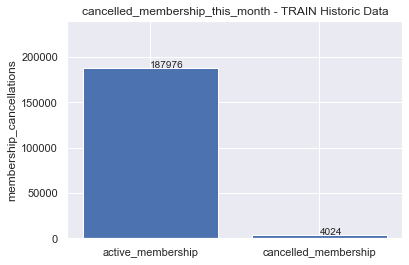

<Figure size 3600x3600 with 0 Axes>

In [508]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

if __name__ == '__main__':
    x = ['active_membership', 'cancelled_membership']
    y = [187976,4024]
    
    
    # making the bar chart on the data
    plt.bar(x, y)
     
    # calling the function to add value labels
    addlabels(x, y)
     
    # giving title to the plot
    plt.title("cancelled_membership_this_month - TRAIN Historic Data")
     
    # giving X and Y labels
    #plt.xlabel("Courses")
    plt.ylabel("membership_cancellations")
    
    plt.ylim(0, 240000)
    plt.figure(figsize=(50, 50))
     
    # visualizing the plot
    plt.show()

In [506]:
# converting an array to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df

y_test_df.groupby(['cancelled_membership_this_month']).size()

cancelled_membership_this_month
0    46981
1     1019
dtype: int64

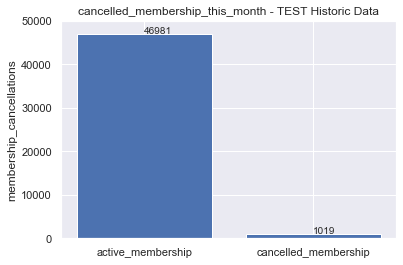

<Figure size 3600x3600 with 0 Axes>

In [510]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

if __name__ == '__main__':
    x = ['active_membership', 'cancelled_membership']
    y = [46981,1019]
    
    
    # making the bar chart on the data
    plt.bar(x, y)
     
    # calling the function to add value labels
    addlabels(x, y)
     
    # giving title to the plot
    plt.title("cancelled_membership_this_month - TEST Historic Data")
     
    # giving X and Y labels
    #plt.xlabel("Courses")
    plt.ylabel("membership_cancellations")
    
    plt.ylim(0, 50000)
    plt.figure(figsize=(50, 50))
     
    # visualizing the plot
    plt.show()

In [131]:
label_undersampled_df = pd.DataFrame(label_undersampled)
label_undersampled_df

label_undersampled_df.groupby(['cancelled_membership_this_month']).size()

cancelled_membership_this_month
0    4024
1    4024
dtype: int64

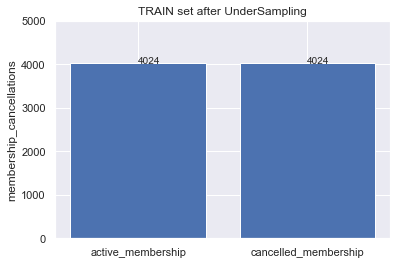

<Figure size 3600x3600 with 0 Axes>

In [513]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

if __name__ == '__main__':
    x = ['active_membership', 'cancelled_membership']
    y = [4024,4024]
    
    
    # making the bar chart on the data
    plt.bar(x, y)
     
    # calling the function to add value labels
    addlabels(x, y)
     
    # giving title to the plot
    plt.title("TRAIN set after UnderSampling")
     
    # giving X and Y labels
    #plt.xlabel("Courses")
    plt.ylabel("membership_cancellations")
    
    plt.ylim(0, 5000)
    plt.figure(figsize=(50, 50))
     
    # visualizing the plot
    plt.show()

#### Logistic Regression

In [369]:
lr_model = LogisticRegression(penalty = 'l2', C = 0.05, solver='lbfgs', max_iter=1000)

In [370]:
# fitting lr classifier to the training set
lr_model_undersampled = lr_model.fit(features_undersampled, label_undersampled)

In [371]:
lr_result = cross_validate(lr_model_undersampled,
                               X = features_undersampled,
                               y = label_undersampled,
                               cv = 5,
                               scoring ='f1',
                               return_train_score = True)

In [372]:
lr_result

{'fit_time': array([0.09075165, 0.09351873, 0.1117723 , 0.10013485, 0.12582564]),
 'score_time': array([0.01634479, 0.        , 0.        , 0.00801945, 0.        ]),
 'test_score': array([0.59887006, 0.592089  , 0.59032456, 0.61764706, 0.61405672]),
 'train_score': array([0.60392646, 0.61166692, 0.60768516, 0.60387297, 0.60752524])}

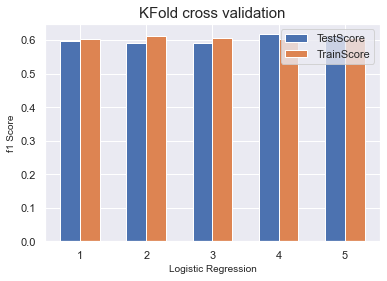

In [385]:
TestScore = [[1,0.59887006],[2,0.592089],[3,0.59032456],[4,0.61764706],[5,0.61405672]]
TrainScore = [[1,0.60392646],[2,0.61166692],[3,0.60768516],[4,0.60387297],[5,0.60752524]]

x1,y1 = zip(*TestScore)
x2,y2 = zip(*TrainScore)
plt.bar(np.array(x1)-0.15, y1, width = 0.3, label="TestScore")
plt.bar(np.array(x2)+0.15, y2, width = 0.3, label="TrainScore")
plt.title('KFold cross validation', fontsize=15)
plt.xlabel('Logistic Regression', fontsize=10)
plt.ylabel('f1 Score', fontsize=10)
plt.legend()
plt.xticks(range(min(x1+x2), max(x1+x2)+1)) 
plt.show()

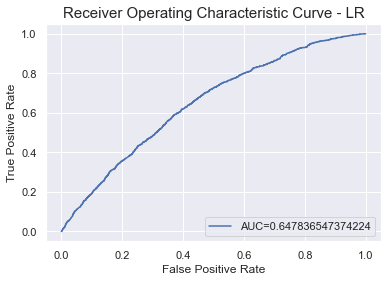

In [377]:
#define metrics
y_pred_proba_lr = lr_model_undersampled.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_lr)
auc = metrics.roc_auc_score(y_test, y_pred_proba_lr)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('Receiver Operating Characteristic Curve - LR', fontsize=15)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#### RF

In [132]:
rf_model = RandomForestClassifier()

In [133]:
# fitting RF classifier to the training set
rf_model_undersampled = rf_model.fit(features_undersampled, label_undersampled)

In [134]:
rf_result = cross_validate(rf_model_undersampled,
                               X = features_undersampled,
                               y = label_undersampled,
                               cv = 5,
                               scoring ='f1',
                               return_train_score = True)

In [135]:
rf_result 

{'fit_time': array([0.80464864, 0.82786059, 0.84080935, 0.86037898, 0.81787372]),
 'score_time': array([0.04315424, 0.04143882, 0.04082918, 0.04394484, 0.04222703]),
 'test_score': array([0.53942428, 0.5494644 , 0.57657658, 0.58267717, 0.56445557]),
 'train_score': array([0.96132597, 0.96160934, 0.96492572, 0.962634  , 0.96030651])}

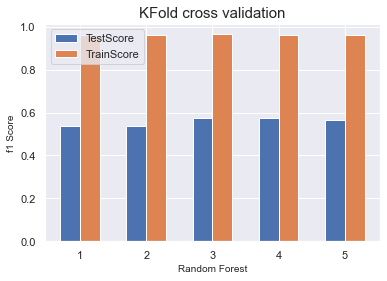

In [386]:
TestScore = [[1,0.53942428],[2,0.53942428],[3,0.57657658],[4,0.57657658],[5,0.56445557]]
TrainScore = [[1,0.96132597],[2,0.96160934],[3,0.96492572],[4,0.962634],[5,0.96030651]]

x1,y1 = zip(*TestScore)
x2,y2 = zip(*TrainScore)
plt.bar(np.array(x1)-0.15, y1, width = 0.3, label="TestScore")
plt.bar(np.array(x2)+0.15, y2, width = 0.3, label="TrainScore")
plt.title('KFold cross validation', fontsize=15)
plt.xlabel('Random Forest', fontsize=10)
plt.ylabel('f1 Score', fontsize=10)
plt.legend()
plt.xticks(range(min(x1+x2), max(x1+x2)+1)) 
plt.show()

In [136]:
# predicting the labels of the test set: preds
y_predicted_rf = rf_model_undersampled.predict(x_test)

In [137]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_predicted_rf))
print(classification_report(y_test, y_predicted_rf))

[[26727 20254]
 [  433   586]]
              precision    recall  f1-score   support

           0       0.98      0.57      0.72     46981
           1       0.03      0.58      0.05      1019

    accuracy                           0.57     48000
   macro avg       0.51      0.57      0.39     48000
weighted avg       0.96      0.57      0.71     48000



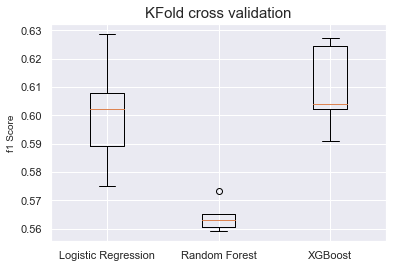

In [374]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(penalty = 'l2', C = 0.05, solver='lbfgs', max_iter=500), "Random Forest": RandomForestClassifier(), "XGBoost": XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=5, shuffle=True, random_state=2486)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, features_undersampled, label_undersampled, cv=kf, scoring='f1')
  results.append(cv_results)
plt.title('KFold cross validation', fontsize=15)
plt.ylabel('f1 Score', fontsize=10)
plt.boxplot(results, labels=models.keys())
plt.show()

#### XGB

In [139]:
# Instantiate the XGBClassifier
xgb_model = XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

In [140]:
# fitting xgb classifier to the training set
xgb_model_undersampled = xgb_model.fit(features_undersampled, label_undersampled)

In [141]:
xgb_result = cross_validate(xgb_model_undersampled,
                               X = features_undersampled,
                               y = label_undersampled,
                               cv = 5,
                               scoring ='f1',
                               return_train_score = True)

In [142]:
xgb_result

{'fit_time': array([0.04110932, 0.04316115, 0.03707004, 0.03968501, 0.03655386]),
 'score_time': array([0.00600314, 0.00600576, 0.0059998 , 0.00452137, 0.00751209]),
 'test_score': array([0.59519409, 0.59525259, 0.61685595, 0.63516746, 0.61052632]),
 'train_score': array([0.68350578, 0.68966556, 0.68595539, 0.67843555, 0.68208092])}

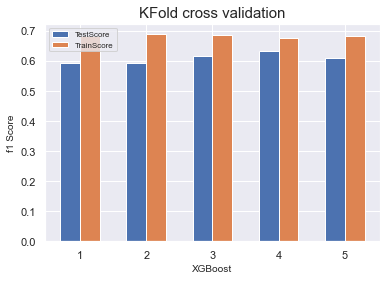

In [417]:
TestScore = [[1,0.59519409],[2,0.59519409],[3,0.61685595],[4,0.63516746],[5,0.61052632]]
TrainScore = [[1,0.68350578],[2,0.68966556],[3,0.68595539],[4,0.67843555],[5,0.68208092]]

x1,y1 = zip(*TestScore)
x2,y2 = zip(*TrainScore)
plt.bar(np.array(x1)-0.15, y1, width = 0.3, label="TestScore")
plt.bar(np.array(x2)+0.15, y2, width = 0.3, label="TrainScore")
plt.title('KFold cross validation', fontsize=15)
plt.xlabel('XGBoost', fontsize=10)
plt.ylabel('f1 Score', fontsize=10)
plt.legend(loc='upper left', prop={'size':8})
plt.xticks(range(min(x1+x2), max(x1+x2)+1)) 
plt.show()

In [143]:
# predicting the labels of the test set: preds
y_predicted_xgb = xgb_model_undersampled.predict(x_test)

In [144]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_predicted_xgb))
print(classification_report(y_test, y_predicted_xgb))

[[28374 18607]
 [  397   622]]
              precision    recall  f1-score   support

           0       0.99      0.60      0.75     46981
           1       0.03      0.61      0.06      1019

    accuracy                           0.60     48000
   macro avg       0.51      0.61      0.41     48000
weighted avg       0.97      0.60      0.73     48000



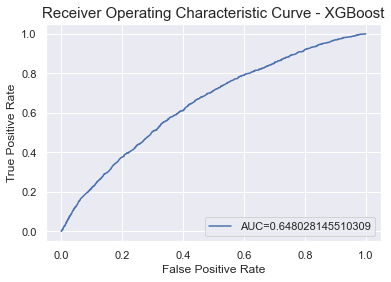

In [376]:
#define metrics
y_pred_proba_xgb = xgb_model_undersampled.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_xgb)
auc = metrics.roc_auc_score(y_test, y_pred_proba_xgb)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('Receiver Operating Characteristic Curve - XGBoost', fontsize=15)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


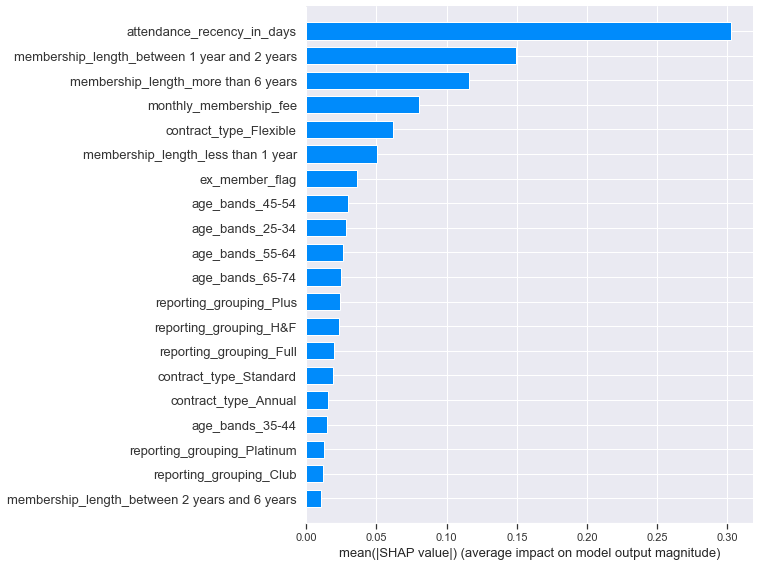

In [290]:
# computing feature importance
explainer = shap.TreeExplainer(xgb_model_undersampled )
shap_values = explainer.shap_values(features_undersampled)
shap.summary_plot(shap_values, features_undersampled, plot_type="bar")

#### HyperParameter tuning

In [391]:
# creating the parameter grid
param_grid = {
    'learning_rate': np.arange(.05, 0.1, 1),
    'max_depth': np.arange(3,10, 1),
    'n_estimators': np.arange(50, 100, 150)
}

In [396]:
## Intantiating BayesSearchCV
xgb_BSearch = BayesSearchCV(xgb_model_undersampled, param_grid, n_iter = 50, scoring='f1', cv = 5, 
                     verbose = 0, return_train_score=True)

In [397]:
## fiting BayesSearchCV
xgb_BSearch = xgb_BSearch.fit(features_undersampled, label_undersampled)

The objective has been evaluated at this point before.
The objective has been evaluated at this point before.
The objective has been evaluated at this point before.
The objective has been evaluated at this point before.
The objective has been evaluated at this point before.
The objective has been evaluated at this point before.
The objective has been evaluated at this point before.
The objective has been evaluated at this point before.
The objective has been evaluated at this point before.
The objective has been evaluated at this point before.
The objective has been evaluated at this point before.
The objective has been evaluated at this point before.
The objective has been evaluated at this point before.
The objective has been evaluated at this point before.
The objective has been evaluated at this point before.
The objective has been evaluated at this point before.
The objective has been evaluated at this point before.
The objective has been evaluated at this point before.
The object

In [407]:
print('Train score:', xgb_BSearch.best_score_)
print(xgb_BSearch.best_params_)

Train score: 0.6175591617830125
OrderedDict([('learning_rate', 0.05), ('max_depth', 4), ('n_estimators', 50)])


In [412]:
print('Test score:', xgb_BSearch.cv_results_['mean_test_score'][xgb_BSearch.best_index_])

Test score: 0.6175591617830125


In [411]:
print('Train score:', xgb_BSearch.cv_results_['mean_train_score'][xgb_BSearch.best_index_])

Train score: 0.6430506636016142


In [405]:
print(xgb_BSearch.cv_results_['split0_test_score'][xgb_BSearch.best_index_], xgb_BSearch.cv_results_['split1_test_score'][xgb_BSearch.best_index_], xgb_BSearch.cv_results_['split2_test_score'][xgb_BSearch.best_index_], xgb_BSearch.cv_results_['split3_test_score'][xgb_BSearch.best_index_], xgb_BSearch.cv_results_['split4_test_score'][xgb_BSearch.best_index_])

0.600997506234414 0.6007326007326007 0.6136919315403424 0.6389391199517781 0.6334346504559271


In [406]:
print(xgb_BSearch.cv_results_['split0_train_score'][xgb_BSearch.best_index_], xgb_BSearch.cv_results_['split1_train_score'][xgb_BSearch.best_index_], xgb_BSearch.cv_results_['split2_train_score'][xgb_BSearch.best_index_], xgb_BSearch.cv_results_['split3_train_score'][xgb_BSearch.best_index_], xgb_BSearch.cv_results_['split4_train_score'][xgb_BSearch.best_index_])

0.6343653250773994 0.6519054074408797 0.6441351888667992 0.6396188719840172 0.6452285246389757


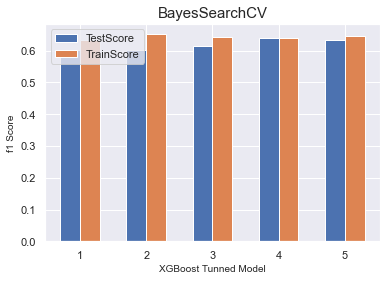

In [414]:
TestScore = [[1,0.600997506234414],[2,0.600997506234414],[3,0.6136919315403424],[4,0.6389391199517781],[5,0.6334346504559271]]
TrainScore = [[1,0.6343653250773994],[2,0.6519054074408797],[3,0.6441351888667992],[4,0.6396188719840172],[5,0.6452285246389757]]

x1,y1 = zip(*TestScore)
x2,y2 = zip(*TrainScore)
plt.bar(np.array(x1)-0.15, y1, width = 0.3, label="TestScore")
plt.bar(np.array(x2)+0.15, y2, width = 0.3, label="TrainScore")
plt.title('BayesSearchCV', fontsize=15)
plt.xlabel('XGBoost Tunned Model', fontsize=10)
plt.ylabel('f1 Score', fontsize=10)
plt.legend(loc='upper left')
plt.xticks(range(min(x1+x2), max(x1+x2)+1)) 
plt.show()

In [399]:
print(xgb_BSearch.cv_results_)

{'mean_fit_time': array([0.10562782, 0.18400497, 0.10093822, 0.11344886, 0.14233603,
       0.08002639, 0.11481085, 0.10286655, 0.1559442 , 0.12947745,
       0.19996419, 0.0663887 , 0.11138339, 0.08645244, 0.07791228,
       0.13188567, 0.06939287, 0.08074894, 0.09303837, 0.08164582,
       0.08064938, 0.26731896, 0.08984876, 0.09193211, 0.19444113,
       0.23669925, 0.1218255 , 0.22003069, 0.1275404 , 0.1933022 ,
       0.11757526, 0.09799953, 0.13605475, 0.09588408, 0.10463476,
       0.11406412, 0.13199763, 0.17727089, 0.13835835, 0.07341514,
       0.15675788, 0.11194067, 0.09331417, 0.09638038, 0.08729248,
       0.09589725, 0.16810846, 0.11259475, 0.19272189, 0.15742116]), 'std_fit_time': array([0.01735152, 0.02530724, 0.0123046 , 0.00664794, 0.01775465,
       0.00312063, 0.00683855, 0.00580102, 0.01019622, 0.01239185,
       0.0133559 , 0.00606274, 0.00186286, 0.01023625, 0.00375002,
       0.00782081, 0.00769226, 0.00327742, 0.00276951, 0.00628606,
       0.0099181 , 0.05658

In [159]:
# predicting the labels of the test set: preds
y_predicted_xgb_BSearch = xgb_BSearch.predict(x_test)

In [160]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_predicted_xgb_BSearch))
print(classification_report(y_test, y_predicted_xgb_BSearch))

[[28262 18719]
 [  381   638]]
              precision    recall  f1-score   support

           0       0.99      0.60      0.75     46981
           1       0.03      0.63      0.06      1019

    accuracy                           0.60     48000
   macro avg       0.51      0.61      0.41     48000
weighted avg       0.97      0.60      0.73     48000



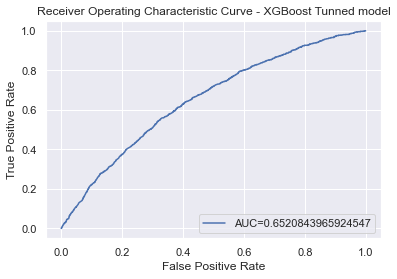

In [378]:
#define metrics
y_pred_proba = xgb_BSearch.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('Receiver Operating Characteristic Curve - XGBoost Tunned model', fontsize=12)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Out-of-Sample

#### Actual versus Predictions 

In [161]:
y_test

45155     0
238446    0
121013    0
176784    0
31780     0
         ..
204196    0
87142     0
132590    0
103915    0
66519     0
Name: cancelled_membership_this_month, Length: 48000, dtype: int64

In [162]:
y_test_df = y_test.reset_index()
y_test_df

index  cancelled_membership_this_month
0       45155                                0
1      238446                                0
2      121013                                0
3      176784                                0
4       31780                                0
...       ...                              ...
47995  204196                                0
47996   87142                                0
47997  132590                                0
47998  103915                                0
47999   66519                                0

[48000 rows x 2 columns]

In [163]:
y_test_df['cancelled_membership_this_month'].value_counts(normalize=True).sort_values()

1    0.021229
0    0.978771
Name: cancelled_membership_this_month, dtype: float64

In [164]:
y_test_df.rename(columns = {'cancelled_membership_this_month':'y'}, inplace = True)
y_test_df

index  y
0       45155  0
1      238446  0
2      121013  0
3      176784  0
4       31780  0
...       ... ..
47995  204196  0
47996   87142  0
47997  132590  0
47998  103915  0
47999   66519  0

[48000 rows x 2 columns]

In [165]:
y_predicted_xgb_BSearch

array([0, 0, 0, ..., 0, 1, 0])

In [166]:
y_predicted_xgb_BSearch_df = pd.DataFrame(y_predicted_xgb_BSearch, columns = ['y_hat'])
print(y_predicted_xgb_BSearch_df)

       y_hat
0          0
1          0
2          0
3          0
4          0
...      ...
47995      0
47996      1
47997      0
47998      1
47999      0

[48000 rows x 1 columns]


In [167]:
y_predicted_xgb_BSearch_df['y_hat'].value_counts(normalize=True).sort_values()

1    0.403271
0    0.596729
Name: y_hat, dtype: float64

In [168]:
y_predict_proba_xgb = xgb_BSearch.predict_proba(x_test)
y_predict_proba_xgb 

array([[0.69502807, 0.30497193],
       [0.55554956, 0.44445044],
       [0.5437986 , 0.45620137],
       ...,
       [0.5906786 , 0.40932143],
       [0.45061457, 0.5493854 ],
       [0.51114553, 0.48885447]], dtype=float32)

In [169]:
y_predicted_probabilites = y_predict_proba_xgb[:, -1]
y_predicted_probabilites

array([0.30497193, 0.44445044, 0.45620137, ..., 0.40932143, 0.5493854 ,
       0.48885447], dtype=float32)

In [170]:
y_predicted_probabilites.shape

(48000,)

In [171]:
y_predicted_probabilites_df=pd.DataFrame(y_predicted_probabilites)
y_predicted_probabilites_df

0
0      0.304972
1      0.444450
2      0.456201
3      0.448766
4      0.323509
...         ...
47995  0.435128
47996  0.570505
47997  0.409321
47998  0.549385
47999  0.488854

[48000 rows x 1 columns]

In [172]:
y_predicted_probabilites_df.rename(columns = {0:'Score_1'}, inplace = True)

In [173]:
y_predicted_probabilites_df

Score_1
0      0.304972
1      0.444450
2      0.456201
3      0.448766
4      0.323509
...         ...
47995  0.435128
47996  0.570505
47997  0.409321
47998  0.549385
47999  0.488854

[48000 rows x 1 columns]

In [174]:
y_test_df

index  y
0       45155  0
1      238446  0
2      121013  0
3      176784  0
4       31780  0
...       ... ..
47995  204196  0
47996   87142  0
47997  132590  0
47998  103915  0
47999   66519  0

[48000 rows x 2 columns]

In [175]:
#decile_df = y_predicted_probabilites_df.join(y_test)
tbl_for_summary = pd.concat([y_test_df, y_predicted_probabilites_df,y_predicted_xgb_BSearch_df], axis=1)
tbl_for_summary

index  y   Score_1  y_hat
0       45155  0  0.304972      0
1      238446  0  0.444450      0
2      121013  0  0.456201      0
3      176784  0  0.448766      0
4       31780  0  0.323509      0
...       ... ..       ...    ...
47995  204196  0  0.435128      0
47996   87142  0  0.570505      1
47997  132590  0  0.409321      0
47998  103915  0  0.549385      1
47999   66519  0  0.488854      0

[48000 rows x 4 columns]

In [176]:
tbl_for_summary['Score_0'] = 1 - tbl_for_summary['Score_1']

In [177]:
tbl_for_summary

index  y   Score_1  y_hat   Score_0
0       45155  0  0.304972      0  0.695028
1      238446  0  0.444450      0  0.555550
2      121013  0  0.456201      0  0.543799
3      176784  0  0.448766      0  0.551234
4       31780  0  0.323509      0  0.676491
...       ... ..       ...    ...       ...
47995  204196  0  0.435128      0  0.564872
47996   87142  0  0.570505      1  0.429495
47997  132590  0  0.409321      0  0.590679
47998  103915  0  0.549385      1  0.450615
47999   66519  0  0.488854      0  0.511146

[48000 rows x 5 columns]

In [178]:
tbl_for_summary['decile'] = pd.qcut(tbl_for_summary['Score_1'].rank(method='first', ascending=False), 10, labels = list(range(1,11)), duplicates='drop')

In [179]:
tbl_for_summary

index  y   Score_1  y_hat   Score_0 decile
0       45155  0  0.304972      0  0.695028     10
1      238446  0  0.444450      0  0.555550      6
2      121013  0  0.456201      0  0.543799      6
3      176784  0  0.448766      0  0.551234      6
4       31780  0  0.323509      0  0.676491      9
...       ... ..       ...    ...       ...    ...
47995  204196  0  0.435128      0  0.564872      7
47996   87142  0  0.570505      1  0.429495      3
47997  132590  0  0.409321      0  0.590679      7
47998  103915  0  0.549385      1  0.450615      3
47999   66519  0  0.488854      0  0.511146      5

[48000 rows x 6 columns]

In [180]:
def FN(tbl_for_summary):
    if (tbl_for_summary['y'] == 1) & (tbl_for_summary['y_hat'] == 0):
        return 1
    else:
        return 0

In [181]:
tbl_for_summary['FN'] = tbl_for_summary.apply(FN, axis=1)

In [182]:
tbl_for_summary['FN'].value_counts()

0    47619
1      381
Name: FN, dtype: int64

In [183]:
def FP(tbl_for_summary):
    if (tbl_for_summary['y'] == 0) & (tbl_for_summary['y_hat'] == 1):
        return 1
    else:
        return 0

In [184]:
tbl_for_summary['FP'] = tbl_for_summary.apply(FP, axis=1)

In [185]:
tbl_for_summary['FP'].value_counts()

0    29281
1    18719
Name: FP, dtype: int64

In [354]:
## creating a summary of actuals, predictions, probabilities and cummulatives for the out-of-sample dataset
summarized_tbl = tbl_for_summary.groupby("decile").agg(count = ("y","count"), actual = ("y","sum"), max = ("Score_1","max"), min = ("Score_1","min"), FN=("FN","sum"), FP=("FP","sum"))

In [355]:
summarized_tbl['Cumulative FN'] = summarized_tbl['FN'].cumsum()

In [356]:
summarized_tbl['Cumulative FP'] = summarized_tbl['FP'].cumsum()

In [357]:
summarized_tbl['Cumulative actual'] = summarized_tbl['actual'].cumsum()

In [358]:
summarized_tbl['Cumulative Abs values'] = summarized_tbl['actual'].cumsum()/ summarized_tbl['actual'].sum()

In [359]:
summarized_tbl['Cumulative %'] = summarized_tbl['Cumulative Abs values'].apply(lambda x: f'{x:.2%}')

In [360]:
summarized_tbl.reset_index(inplace=True)
summarized_tbl

decile  count  actual       max       min  FN    FP  Cumulative FN  \
0      1   4800     217  0.816492  0.618359   0  4583              0   
1      2   4800     168  0.618359  0.570962   0  4632              0   
2      3   4800     131  0.570962  0.547343   0  4669              0   
3      4   4800     118  0.547343  0.501232   0  4682              0   
4      5   4800      99  0.501232  0.474125  95   153             95   
5      6   4800      73  0.474125  0.438336  73     0            168   
6      7   4800      72  0.438336  0.404234  72     0            240   
7      8   4800      68  0.404234  0.358792  68     0            308   
8      9   4800      46  0.358727  0.320217  46     0            354   
9     10   4800      27  0.320217  0.174738  27     0            381   

   Cumulative FP  Cumulative actual  Cumulative Abs values Cumulative %  
0           4583                217               0.212954       21.30%  
1           9215                385               0.377821       37.78%  
2          13884                516               0.506379       50.64%  
3          18566                634               0.622179       62.22%  
4          18719                733               0.719333       71.93%  
5          18719                806               0.790972       79.10%  
6          18719                878               0.861629       86.16%  
7          18719                946               0.928361       92.84%  
8          18719                992               0.973503       97.35%  
9          18719               1019               1.000000      100.00%

In [192]:
plot_cum = list(summarized_tbl['Cumulative Abs values'])
plot_cum

[0.2129538763493621,
 0.3778213935230618,
 0.5063788027477919,
 0.6221786064769381,
 0.719332679097154,
 0.7909715407262021,
 0.8616290480863592,
 0.9283611383709519,
 0.9735034347399412,
 1.0]

In [193]:
count = list(summarized_tbl['count'])
count

[4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800]

#### cumulative gain chart

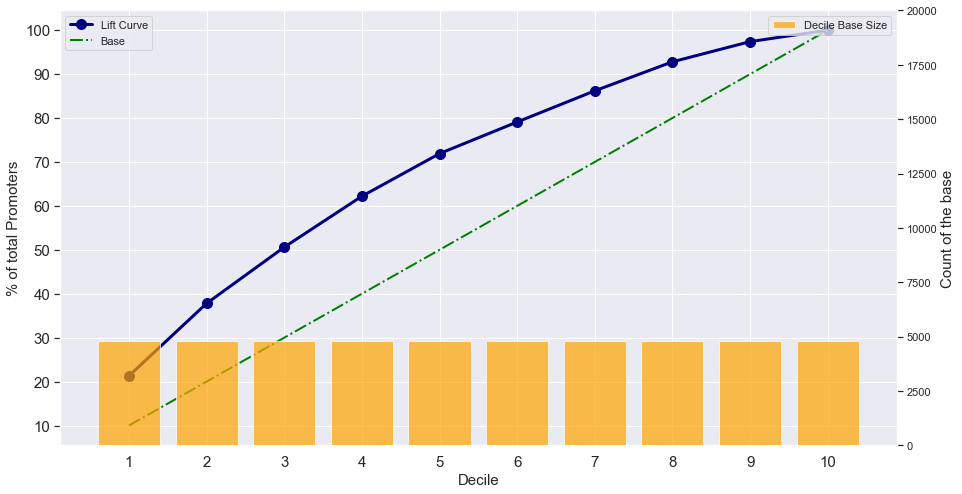

In [194]:
decile = [1,2,3,4,5,6,7,8,9,10]

fig, ax = plt.subplots(figsize=(15,8))

plt.plot(decile, [round(x*100,1) for x in plot_cum], marker='o', c='Navy', markersize=10, linewidth=3, label="Lift Curve", zorder=10)

plt.plot([1, 10], [10,100 ], color='green', linestyle='dashdot', linewidth=2, label="Base", zorder=10)
plt.xlabel('Decile', fontsize=15)
plt.legend(loc='best')
plt.ylabel('% of total Promoters', fontsize=15)
plt.xticks(np.arange(1, 10+1, 1), fontsize=15)
plt.yticks(np.arange(10, 100+1, 10), fontsize=15)

ax2 = ax.twinx()

ax2.bar(decile, count, color='orange', label='Decile Base Size', zorder=11, alpha=0.7)
#ax2.bar(deciles + width, base, width, color='blue', label='Decile base size', zorder=11, alpha=0.7)
ax2.legend(loc=1)

ax2.set_ylim(0, 20000)
ax2.set_ylabel('Count of the base', fontsize=15)
plt.grid()
plt.show()

#### Members to be targeted dataset

In [253]:
#Loading dataset
df_targeted = pd.read_csv('targeted.csv')

In [254]:
df_targeted

record_id  age  length_of_membership_in_months contract_type  \
0              1   17                              20      Standard   
1              2   56                             376      Standard   
2              3    4                              23      Standard   
3              4   54                              64      Standard   
4              5   39                              13      Standard   
...          ...  ...                             ...           ...   
59995      59996   51                             114      Standard   
59996      59997   30                               3      Flexible   
59997      59998   18                             159      Standard   
59998      59999    7                              13      Standard   
59999      60000   48                              27      Standard   

      reporting_grouping  monthly_membership_fee  attendance_recency_in_days  \
0                  Child               36.861076                          60   
1                    H&F               67.500000                           1   
2                  Child               15.000000                          35   
3                  Other               60.375000                          22   
4                  Other               48.333332                          12   
...                  ...                     ...                         ...   
59995                H&F               49.967236                           4   
59996               Plus               83.333336                           9   
59997              Child               25.833334                          12   
59998              Child                0.000000                          61   
59999           Platinum               57.500000                          61   

       attendance_two_months_ago  attendance_last_month  ex_member_flag  
0                              0                      1               1  
1                             30                     27               1  
2                              0                      1               0  
3                              1                      3               1  
4                              2                      0               1  
...                          ...                    ...             ...  
59995                          2                      3               1  
59996                          5                     11               1  
59997                          4                      6               1  
59998                          0                      0               0  
59999                          0                      0               1  

[60000 rows x 10 columns]

In [419]:
df_targeted

contract_type reporting_grouping  monthly_membership_fee  \
0          Standard              Child               36.861076   
1          Standard                H&F               67.500000   
2          Standard              Child               15.000000   
3          Standard              Other               60.375000   
4          Standard              Other               48.333332   
...             ...                ...                     ...   
59995      Standard                H&F               49.967236   
59996      Flexible               Plus               83.333336   
59997      Standard              Child               25.833334   
59998      Standard              Child                0.000000   
59999      Standard           Platinum               57.500000   

       attendance_recency_in_days  ex_member_flag age_bands  \
0                              60               1      3-18   
1                               1               1     55-64   
2                              35               0      3-18   
3                              22               1     45-54   
4                              12               1     35-44   
...                           ...             ...       ...   
59995                           4               1     45-54   
59996                           9               1     25-34   
59997                          12               1      3-18   
59998                          61               0      3-18   
59999                          61               1     45-54   

                 membership_length  
0       between 1 year and 2 years  
1                more than 6 years  
2       between 1 year and 2 years  
3      between 2 years and 6 years  
4       between 1 year and 2 years  
...                            ...  
59995            more than 6 years  
59996             less than 1 year  
59997            more than 6 years  
59998   between 1 year and 2 years  
59999   between 1 year and 2 years  

[60000 rows x 7 columns]

#### pre-processing

<AxesSubplot:>

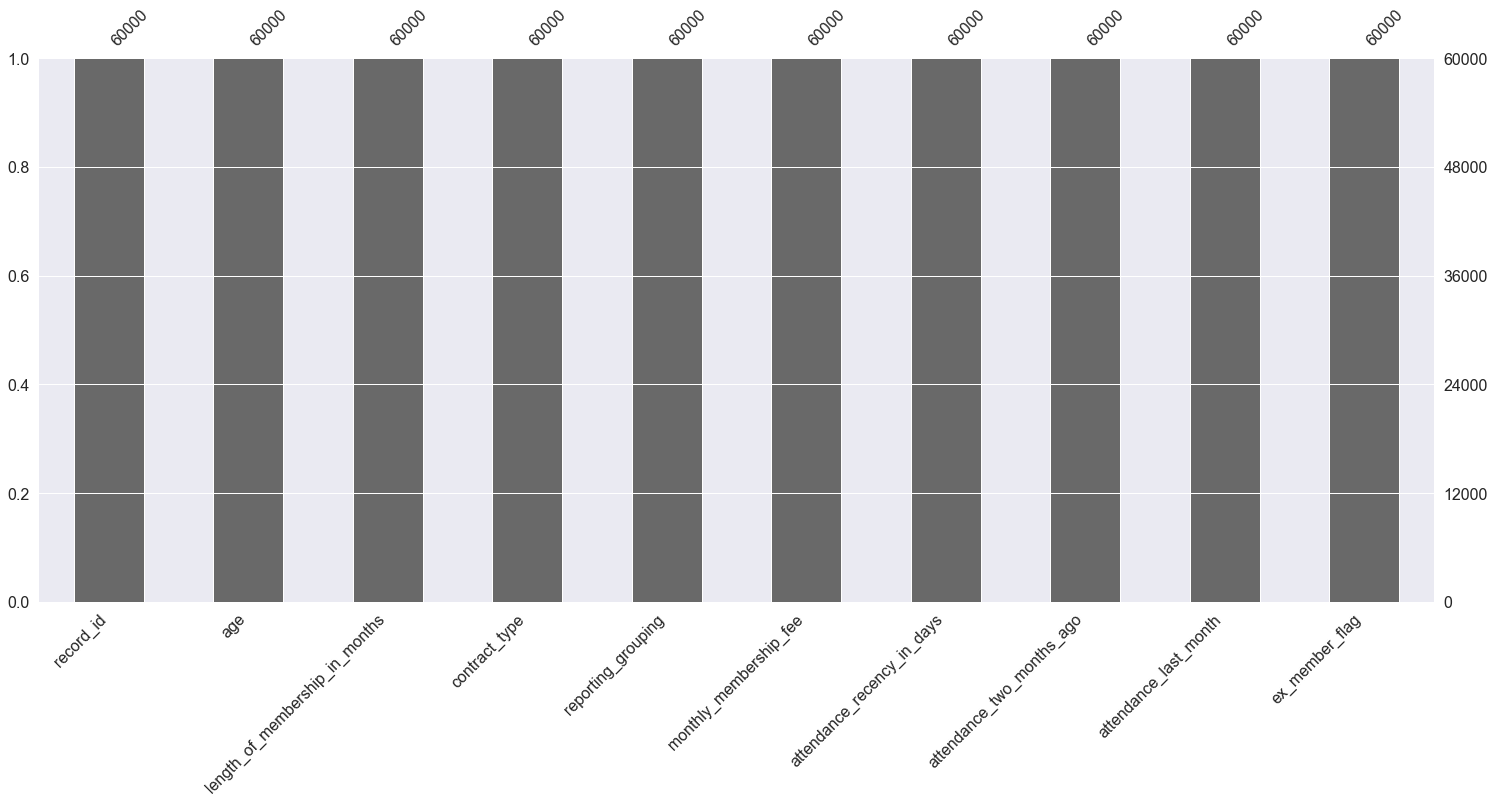

In [233]:
#plotting missing values
msno.bar(df_targeted)

In [255]:
df_targeted.describe()

record_id           age  length_of_membership_in_months  \
count  60000.000000  60000.000000                     60000.00000   
mean   30000.500000     35.629117                        51.02390   
std    17320.652413     20.406519                        62.52272   
min        1.000000      0.000000                         0.00000   
25%    15000.750000     17.000000                         9.00000   
50%    30000.500000     38.000000                        27.00000   
75%    45000.250000     51.000000                        67.00000   
max    60000.000000    119.000000                       730.00000   

       monthly_membership_fee  attendance_recency_in_days  \
count            60000.000000                60000.000000   
mean                55.851985                   19.085550   
std                 35.661218                   22.197264   
min                  0.000000                    1.000000   
25%                 29.166666                    2.000000   
50%                 55.541668                    8.000000   
75%                 75.000000                   31.000000   
max                740.833313                   61.000000   

       attendance_two_months_ago  attendance_last_month  ex_member_flag  
count               60000.000000           60000.000000    60000.000000  
mean                    5.268250               5.034817        0.435867  
std                     5.682267               5.527566        0.495874  
min                     0.000000               0.000000        0.000000  
25%                     1.000000               0.000000        0.000000  
50%                     4.000000               3.000000        0.000000  
75%                     8.000000               8.000000        1.000000  
max                    31.000000              30.000000        1.000000

In [261]:
#converting the age variable into categorical: age bands
def AgeBands(df_targeted):    
    if (df_targeted['age'] in (0,1,2)):
        return '1-2'
    elif (df_targeted['age'] in (9,96)):
        return 'n/a'
    elif (df_targeted['age'] in (3,4,5,6,7,8,10,11,12,13,14,15,16,17,18)):
        return '3-18'
    elif (df_targeted['age'] in (19,20,21,22,23,24)):
        return '19-24'
    elif (df_targeted['age'] in (25,26,27,28,29,30,31,32,33,34)):
        return '25-34'
    elif (df_targeted['age'] in (35,36,37,38,39,40,41,42,43,44)):
        return '35-44'
    elif (df_targeted['age'] in (45,46,47,48,49,50,51,52,53,54)):
        return '45-54'
    elif (df_targeted['age'] in (55,56,57,58,59,60,61,62,63,64)):
        return '55-64'
    elif (df_targeted['age'] in (65,66,67,68,69,70,71,72,73,74)):
        return '65-74'
    elif (df_targeted['age'] in (75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,98,103,104,105,117,118,119)):
        return '75+'

In [262]:
df_targeted['age_bands'] = df_targeted.apply(AgeBands, axis = 1)

In [263]:
df_targeted['age_bands'].value_counts()

3-18     12281
35-44    11066
45-54    10820
25-34     7985
55-64     6979
65-74     3345
19-24     3051
1-2       2524
75+       1060
n/a        889
Name: age_bands, dtype: int64

In [264]:
df_targeted['quantile_rank'] = pd.qcut(df_targeted['length_of_membership_in_months'], 4,
                               labels = False)

In [265]:
df_targeted['quantile_rank'].value_counts()

1    15552
0    15059
3    14962
2    14427
Name: quantile_rank, dtype: int64

In [266]:
#converting the age variable into categorical: age bands
def membership_length(df_targeted):    
    if (df_targeted['quantile_rank'] == 0):
        return 'less than 1 year'
    elif (df_targeted['quantile_rank'] == 1):
        return 'between 1 year and 2 years'
    elif (df_targeted['quantile_rank'] == 2):
        return 'between 2 years and 6 years'
    elif (df_targeted['quantile_rank'] == 3):
        return 'more than 6 years'

In [267]:
df_targeted['membership_length'] = df_targeted.apply(membership_length, axis = 1)

In [268]:
df_targeted['membership_length'].value_counts()

between 1 year and 2 years     15552
less than 1 year               15059
more than 6 years              14962
between 2 years and 6 years    14427
Name: membership_length, dtype: int64

In [269]:
#bucketing a variable
def Type(df_targeted):    
    if ((df_targeted['reporting_grouping'] == 'Child') & (df_targeted['age'] in (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18))):
        return 'Child'
    elif (df_targeted['reporting_grouping'] in ('Club','Full','H&F','Other','Platinum','Plus','Diamond')):
        return 'Individual'

In [270]:
#df_targeted['membership_type'] = df_targeted.apply(Type, axis = 1)

In [271]:
#df_targeted['membership_length'] = df_targeted.apply(membership_length, axis = 1)

In [272]:
drop4 = df_targeted[['record_id','length_of_membership_in_months','quantile_rank','attendance_two_months_ago','attendance_last_month','age']]
df_targeted = df_targeted.drop(drop4, axis=1)

In [273]:
df_targeted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   contract_type               60000 non-null  object 
 1   reporting_grouping          60000 non-null  object 
 2   monthly_membership_fee      60000 non-null  float64
 3   attendance_recency_in_days  60000 non-null  int64  
 4   ex_member_flag              60000 non-null  int64  
 5   age_bands                   60000 non-null  object 
 6   membership_length           60000 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 3.2+ MB


#### OneHot encoding

In [421]:
onehotencoder = OneHotEncoder()

In [422]:
# Create a boolean mask for categorical columns
categorical_mask = df_targeted.dtypes == object
categorical_mask

contract_type                  True
reporting_grouping             True
monthly_membership_fee        False
attendance_recency_in_days    False
ex_member_flag                False
age_bands                      True
membership_length              True
dtype: bool

In [423]:
# Get list of categorical column names
categorical_columns = df_targeted.columns[categorical_mask].tolist()
categorical_columns

['contract_type', 'reporting_grouping', 'age_bands', 'membership_length']

In [424]:
# Print the head of the categorical columns
print(df_targeted[categorical_columns].head())

  contract_type reporting_grouping age_bands            membership_length
0      Standard              Child      3-18   between 1 year and 2 years
1      Standard                H&F     55-64            more than 6 years
2      Standard              Child      3-18   between 1 year and 2 years
3      Standard              Other     45-54  between 2 years and 6 years
4      Standard              Other     35-44   between 1 year and 2 years


In [425]:
# applying onehot encoding on categorical feature columns
transformed_data = onehotencoder.fit_transform(df_targeted[categorical_columns])

In [426]:
# OneHotEncoder returns a sparse matrix
transformed_data

<60000x25 sparse matrix of type '<class 'numpy.float64'>'
	with 240000 stored elements in Compressed Sparse Row format>

In [427]:
enc_data=pd.DataFrame((transformed_data).toarray())
enc_data

0    1    2    3    4    5    6    7    8    9   ...   15   16   17  \
0      0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0   
2      0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  1.0  0.0   
4      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
59995  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0   
59996  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
59997  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
59998  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
59999  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  1.0  0.0   

        18   19   20   21   22   23   24  
0      0.0  0.0  0.0  1.0  0.0  0.0  0.0  
1      0.0  0.0  0.0  0.0  0.0  0.0  1.0  
2      0.0  0.0  0.0  1.0  0.0  0.0  0.0  
3      0.0  0.0  0.0  0.0  1.0  0.0  0.0  
4      0.0  0.0  0.0  1.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
59995  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
59996  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
59997  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
59998  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
59999  0.0  0.0  0.0  1.0  0.0  0.0  0.0  

[60000 rows x 25 columns]

In [428]:
enc_data.columns = onehotencoder.get_feature_names_out(['contract_type', 'reporting_grouping', 'age_bands', 'membership_length'])

In [429]:
#Merge with main
#features_encoded=features.join(enc_data)
test_features_encoded = pd.concat([df_targeted, enc_data], axis=1)
test_features_encoded

contract_type reporting_grouping  monthly_membership_fee  \
0          Standard              Child               36.861076   
1          Standard                H&F               67.500000   
2          Standard              Child               15.000000   
3          Standard              Other               60.375000   
4          Standard              Other               48.333332   
...             ...                ...                     ...   
59995      Standard                H&F               49.967236   
59996      Flexible               Plus               83.333336   
59997      Standard              Child               25.833334   
59998      Standard              Child                0.000000   
59999      Standard           Platinum               57.500000   

       attendance_recency_in_days  ex_member_flag age_bands  \
0                              60               1      3-18   
1                               1               1     55-64   
2                              35               0      3-18   
3                              22               1     45-54   
4                              12               1     35-44   
...                           ...             ...       ...   
59995                           4               1     45-54   
59996                           9               1     25-34   
59997                          12               1      3-18   
59998                          61               0      3-18   
59999                          61               1     45-54   

                 membership_length  contract_type_Annual  \
0       between 1 year and 2 years                   0.0   
1                more than 6 years                   0.0   
2       between 1 year and 2 years                   0.0   
3      between 2 years and 6 years                   0.0   
4       between 1 year and 2 years                   0.0   
...                            ...                   ...   
59995            more than 6 years                   0.0   
59996             less than 1 year                   0.0   
59997            more than 6 years                   0.0   
59998   between 1 year and 2 years                   0.0   
59999   between 1 year and 2 years                   0.0   

       contract_type_Flexible  contract_type_Standard  ...  age_bands_35-44  \
0                         0.0                     1.0  ...              0.0   
1                         0.0                     1.0  ...              0.0   
2                         0.0                     1.0  ...              0.0   
3                         0.0                     1.0  ...              0.0   
4                         0.0                     1.0  ...              1.0   
...                       ...                     ...  ...              ...   
59995                     0.0                     1.0  ...              0.0   
59996                     1.0                     0.0  ...              0.0   
59997                     0.0                     1.0  ...              0.0   
59998                     0.0                     1.0  ...              0.0   
59999                     0.0                     1.0  ...              0.0   

       age_bands_45-54  age_bands_55-64  age_bands_65-74  age_bands_75+  \
0                  0.0              0.0              0.0            0.0   
1                  0.0              1.0              0.0            0.0   
2                  0.0              0.0              0.0            0.0   
3                  1.0              0.0              0.0            0.0   
4                  0.0              0.0              0.0            0.0   
...                ...              ...              ...            ...   
59995              1.0              0.0              0.0            0.0   
59996              0.0              0.0              0.0            0.0   
59997              0.0              0.0              0.0            0.0   
59998              0.0              

In [430]:
features_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 27 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   monthly_membership_fee                         240000 non-null  float64
 1   attendance_recency_in_days                     240000 non-null  int64  
 2   ex_member_flag                                 240000 non-null  int64  
 3   contract_type_Annual                           240000 non-null  float64
 4   contract_type_Flexible                         240000 non-null  float64
 5   contract_type_Standard                         240000 non-null  float64
 6   reporting_grouping_Child                       240000 non-null  float64
 7   reporting_grouping_Club                        240000 non-null  float64
 8   reporting_grouping_Full                        240000 non-null  float64
 9   reporting_grouping_H&F               

In [431]:
drop5 = ['contract_type','reporting_grouping','age_bands','membership_length','reporting_grouping_Diamond']
test_features_encoded=test_features_encoded.drop(drop5, axis=1)
test_features_encoded

monthly_membership_fee  attendance_recency_in_days  ex_member_flag  \
0                   36.861076                          60               1   
1                   67.500000                           1               1   
2                   15.000000                          35               0   
3                   60.375000                          22               1   
4                   48.333332                          12               1   
...                       ...                         ...             ...   
59995               49.967236                           4               1   
59996               83.333336                           9               1   
59997               25.833334                          12               1   
59998                0.000000                          61               0   
59999               57.500000                          61               1   

       contract_type_Annual  contract_type_Flexible  contract_type_Standard  \
0                       0.0                     0.0                     1.0   
1                       0.0                     0.0                     1.0   
2                       0.0                     0.0                     1.0   
3                       0.0                     0.0                     1.0   
4                       0.0                     0.0                     1.0   
...                     ...                     ...                     ...   
59995                   0.0                     0.0                     1.0   
59996                   0.0                     1.0                     0.0   
59997                   0.0                     0.0                     1.0   
59998                   0.0                     0.0                     1.0   
59999                   0.0                     0.0                     1.0   

       reporting_grouping_Child  reporting_grouping_Club  \
0                           1.0                      0.0   
1                           0.0                      0.0   
2                           1.0                      0.0   
3                           0.0                      0.0   
4                           0.0                      0.0   
...                         ...                      ...   
59995                       0.0                      0.0   
59996                       0.0                      0.0   
59997                       1.0                      0.0   
59998                       1.0                      0.0   
59999                       0.0                      0.0   

       reporting_grouping_Full  reporting_grouping_H&F  ...  age_bands_35-44  \
0                          0.0                     0.0  ...              0.0   
1                          0.0                     1.0  ...              0.0   
2                          0.0                     0.0  ...              0.0   
3                          0.0                     0.0  ...              0.0   
4                          0.0                     0.0  ...              1.0   
...                        ...                     ...  ...              ...   
59995                      0.0                     1.0  ...              0.0   
59996                      0.0                     0.0  ...              0.0   
59997                      0.0                     0.0  ...              0.0   
59998                      0.0                     0.0  ...              0.0   
59999                      0.0                     0.0  ...              0.0   

       age_bands_45-54  age_bands_55-64  age_bands_65-74  age_bands_75+  \
0                  0.0              0.0              0.0            0.0   
1                  0.0              1.0              0.0            0.0   
2                  0.0              0.0              0.0            0.0   
3                  1.0              0.0              0.0            0.0   
4                  0.0              0.0              0.0            0.0   
.

In [432]:
test_features_encoded

monthly_membership_fee  attendance_recency_in_days  ex_member_flag  \
0                   36.861076                          60               1   
1                   67.500000                           1               1   
2                   15.000000                          35               0   
3                   60.375000                          22               1   
4                   48.333332                          12               1   
...                       ...                         ...             ...   
59995               49.967236                           4               1   
59996               83.333336                           9               1   
59997               25.833334                          12               1   
59998                0.000000                          61               0   
59999               57.500000                          61               1   

       contract_type_Annual  contract_type_Flexible  contract_type_Standard  \
0                       0.0                     0.0                     1.0   
1                       0.0                     0.0                     1.0   
2                       0.0                     0.0                     1.0   
3                       0.0                     0.0                     1.0   
4                       0.0                     0.0                     1.0   
...                     ...                     ...                     ...   
59995                   0.0                     0.0                     1.0   
59996                   0.0                     1.0                     0.0   
59997                   0.0                     0.0                     1.0   
59998                   0.0                     0.0                     1.0   
59999                   0.0                     0.0                     1.0   

       reporting_grouping_Child  reporting_grouping_Club  \
0                           1.0                      0.0   
1                           0.0                      0.0   
2                           1.0                      0.0   
3                           0.0                      0.0   
4                           0.0                      0.0   
...                         ...                      ...   
59995                       0.0                      0.0   
59996                       0.0                      0.0   
59997                       1.0                      0.0   
59998                       1.0                      0.0   
59999                       0.0                      0.0   

       reporting_grouping_Full  reporting_grouping_H&F  ...  age_bands_35-44  \
0                          0.0                     0.0  ...              0.0   
1                          0.0                     1.0  ...              0.0   
2                          0.0                     0.0  ...              0.0   
3                          0.0                     0.0  ...              0.0   
4                          0.0                     0.0  ...              1.0   
...                        ...                     ...  ...              ...   
59995                      0.0                     1.0  ...              0.0   
59996                      0.0                     0.0  ...              0.0   
59997                      0.0                     0.0  ...              0.0   
59998                      0.0                     0.0  ...              0.0   
59999                      0.0                     0.0  ...              0.0   

       age_bands_45-54  age_bands_55-64  age_bands_65-74  age_bands_75+  \
0                  0.0              0.0              0.0            0.0   
1                  0.0              1.0              0.0            0.0   
2                  0.0              0.0              0.0            0.0   
3                  1.0              0.0              0.0            0.0   
4                  0.0              0.0              0.0            0.0   
.

In [433]:
# predicting the labels of the test set: preds
test_predicted_xgb_BSearch = xgb_BSearch.predict(test_features_encoded)

In [434]:
test_predicted_xgb_BSearch

array([1, 0, 1, ..., 0, 1, 1])

In [435]:
test_predicted_xgb_BSearch_df = pd.DataFrame(test_predicted_xgb_BSearch, columns = ['y_hat'])
print(test_predicted_xgb_BSearch_df)

       y_hat
0          1
1          0
2          1
3          1
4          1
...      ...
59995      0
59996      1
59997      0
59998      1
59999      1

[60000 rows x 1 columns]


In [436]:
test_predicted_xgb_BSearch_df['y_hat'].value_counts(normalize=True).sort_values()

1    0.40505
0    0.59495
Name: y_hat, dtype: float64

In [437]:
# computing probabilities
test_predict_proba_xgb = xgb_BSearch.predict_proba(test_features_encoded)
test_predict_proba_xgb 

array([[0.3576172 , 0.6423828 ],
       [0.67092943, 0.32907057],
       [0.38892764, 0.61107236],
       ...,
       [0.52600265, 0.47399735],
       [0.34990436, 0.65009564],
       [0.36465114, 0.63534886]], dtype=float32)

In [438]:
test_predicted_probabilites = test_predict_proba_xgb[:, -1]
test_predicted_probabilites

array([0.6423828 , 0.32907057, 0.61107236, ..., 0.47399735, 0.65009564,
       0.63534886], dtype=float32)

In [439]:
test_predicted_probabilites.shape

(60000,)

In [440]:
test_predicted_probabilites_df=pd.DataFrame(test_predicted_probabilites)
test_predicted_probabilites_df

0
0      0.642383
1      0.329071
2      0.611072
3      0.508363
4      0.588022
...         ...
59995  0.318097
59996  0.651225
59997  0.473997
59998  0.650096
59999  0.635349

[60000 rows x 1 columns]

In [441]:
test_predicted_probabilites_df.rename(columns = {0:'Score_1'}, inplace = True)

In [442]:
test_predicted_probabilites_df

Score_1
0      0.642383
1      0.329071
2      0.611072
3      0.508363
4      0.588022
...         ...
59995  0.318097
59996  0.651225
59997  0.473997
59998  0.650096
59999  0.635349

[60000 rows x 1 columns]

In [443]:
#decile_df = y_predicted_probabilites_df.join(y_test)
tbl_for_summary_test = pd.concat([test_predicted_probabilites_df,test_predicted_xgb_BSearch_df], axis=1)
tbl_for_summary_test

Score_1  y_hat
0      0.642383      1
1      0.329071      0
2      0.611072      1
3      0.508363      1
4      0.588022      1
...         ...    ...
59995  0.318097      0
59996  0.651225      1
59997  0.473997      0
59998  0.650096      1
59999  0.635349      1

[60000 rows x 2 columns]

In [444]:
tbl_for_summary_test['Score_0'] = 1 - tbl_for_summary_test['Score_1']

In [445]:
tbl_for_summary_test

Score_1  y_hat   Score_0
0      0.642383      1  0.357617
1      0.329071      0  0.670929
2      0.611072      1  0.388928
3      0.508363      1  0.491637
4      0.588022      1  0.411978
...         ...    ...       ...
59995  0.318097      0  0.681903
59996  0.651225      1  0.348775
59997  0.473997      0  0.526003
59998  0.650096      1  0.349904
59999  0.635349      1  0.364651

[60000 rows x 3 columns]

In [446]:
tbl_for_summary_test['decile'] = pd.qcut(tbl_for_summary_test['Score_1'].rank(method='first', ascending=False), 10, labels = list(range(1,11)), duplicates='drop')

In [447]:
tbl_for_summary_test

Score_1  y_hat   Score_0 decile
0      0.642383      1  0.357617      1
1      0.329071      0  0.670929      9
2      0.611072      1  0.388928      2
3      0.508363      1  0.491637      4
4      0.588022      1  0.411978      2
...         ...    ...       ...    ...
59995  0.318097      0  0.681903     10
59996  0.651225      1  0.348775      1
59997  0.473997      0  0.526003      6
59998  0.650096      1  0.349904      1
59999  0.635349      1  0.364651      1

[60000 rows x 4 columns]

In [448]:
ct = pd.crosstab(tbl_for_summary_test['y_hat'], tbl_for_summary_test
                 ['decile'],  
                 normalize= True, 
                 margins=True, margins_name='Total')
ct.style.format('{:.2%}')

In [449]:
ct = pd.crosstab(tbl_for_summary_test['y_hat'], tbl_for_summary_test
                 ['decile'],  
                 #normalize= True, 
                 margins=True, margins_name='Total')
ct
#.style.format('{:.2%}')

decile     1     2     3     4     5     6     7     8     9    10  Total
y_hat                                                                    
0          0     0     0     0  5697  6000  6000  6000  6000  6000  35697
1       6000  6000  6000  6000   303     0     0     0     0     0  24303
Total   6000  6000  6000  6000  6000  6000  6000  6000  6000  6000  60000

In [454]:
## creating a summary of the predictions, probabilities and cummulatives for the members to target dataset
summarized_tbl = tbl_for_summary_test.groupby("decile").agg(count = ("y_hat","count"), pred = ("y_hat","sum"), max = ("Score_1","max"), min = ("Score_1","min"))
summarized_tbl['Cumulative pred'] = summarized_tbl['pred'].cumsum()

In [455]:
summarized_tbl['Cumulative predictions %'] = summarized_tbl['pred'].cumsum()/ summarized_tbl['pred'].sum()

In [456]:
summarized_tbl['Cumulative %'] = summarized_tbl['Cumulative predictions %'].apply(lambda x: f'{x:.2%}')

In [457]:
summarized_tbl

count  pred       max       min  Cumulative pred  \
decile                                                     
1        6000  6000  0.816492  0.617940             6000   
2        6000  6000  0.617940  0.572165            12000   
3        6000  6000  0.572165  0.546579            18000   
4        6000  6000  0.546579  0.501785            24000   
5        6000   303  0.501785  0.475318            24303   
6        6000     0  0.475318  0.439329            24303   
7        6000     0  0.439329  0.404381            24303   
8        6000     0  0.404381  0.359688            24303   
9        6000     0  0.359688  0.320217            24303   
10       6000     0  0.320217  0.174738            24303   

        Cumulative predictions % Cumulative %  
decile                                         
1                       0.246883       24.69%  
2                       0.493766       49.38%  
3                       0.740649       74.06%  
4                       0.987532       98.75%  
5                       1.000000      100.00%  
6                       1.000000      100.00%  
7                       1.000000      100.00%  
8                       1.000000      100.00%  
9                       1.000000      100.00%  
10                      1.000000      100.00%

In [458]:
summarized_tbl.reset_index(inplace=True)

In [459]:
summarized_tbl

decile  count  pred       max       min  Cumulative pred  \
0      1   6000  6000  0.816492  0.617940             6000   
1      2   6000  6000  0.617940  0.572165            12000   
2      3   6000  6000  0.572165  0.546579            18000   
3      4   6000  6000  0.546579  0.501785            24000   
4      5   6000   303  0.501785  0.475318            24303   
5      6   6000     0  0.475318  0.439329            24303   
6      7   6000     0  0.439329  0.404381            24303   
7      8   6000     0  0.404381  0.359688            24303   
8      9   6000     0  0.359688  0.320217            24303   
9     10   6000     0  0.320217  0.174738            24303   

   Cumulative predictions % Cumulative %  
0                  0.246883       24.69%  
1                  0.493766       49.38%  
2                  0.740649       74.06%  
3                  0.987532       98.75%  
4                  1.000000      100.00%  
5                  1.000000      100.00%  
6                  1.000000      100.00%  
7                  1.000000      100.00%  
8                  1.000000      100.00%  
9                  1.000000      100.00%